# QF 627 Programming and Computational Finance
## Lesson 03 | Analyzing Historical Stock and Index Data (Featuring plotly) | `XZJ`view

> In the second half of this week's lesson, you will learn about `analysis of historical stock and index data`.

> To accomplish this, you will integrate what you have learned about `numpy`, `matplotlib`, and `pandas` modules. 

> As usual, there will be additional modules to be shared: namely, `pandas_datareader` (for extracting historical stock data) and `plotly` (for interactive visualization of financial data analysis).

> Let's have yet another informative learning week, Team :)

### Activation of necessary modules.

In [1]:
%pip install pandas-datareader

     |████████████████████████████████| 109 kB 7.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 11.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade pandas
%pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.4 MB 9.4 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import pandas_datareader.data as web

import datetime

import numpy as np
import matplotlib.pyplot as plt

> Let's make all our graphics inline.

In [5]:
%matplotlib inline

> Let's set some pandas options upfront so that you can explore your data more efficiently.

In [6]:
pd.set_option("max_rows", 20)

### Obtaining historical stock and index data

#### Fetching stock data from Yahoo! 

> Let's request the previous three years (2018 October through yesterday) of data for Tesla.

In [7]:
start = datetime.date(2018, 10, 1)
end = datetime.date(2021, 9, 7)

> Let's extract stock data for `TSLA`.

> `DataReader()` extracts the stock prices for the S&P 500 for the dates we selected from Yahoo Finance.

In [8]:
tesla = web.DataReader("TELA", "yahoo", start, end)

In [9]:
tesla.tail()

High    Low    Open  Close  Volume  Adj Close
Date                                                       
2021-08-31  13.508  13.10  13.380  13.10   19700      13.10
2021-09-01  13.580  13.20  13.280  13.40    9400      13.40
2021-09-02  13.250  13.00  13.250  13.10    7000      13.10
2021-09-03  13.459  12.63  13.459  13.02   10400      13.02
2021-09-07  13.000  12.60  13.000  12.78   16900      12.78

> Let's retrieves the historical prices for a list of stocks

In [10]:
def extract(TICKERS, start, end):
    def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
    S = map(data, TICKERS)
    return pd.concat(S, keys = TICKERS, names = ["Ticker", "Date"])

> Let's get data for stocks of following companies:

- Apple
- Microsoft
- Netflix
- Facebook
- Boeing
- United Airlines
- Goldman Sachs
- JP Morgan Chase


In [11]:
TICKERS = ["AAPL", "MSFT", "NFLX", "FB", "BA", "UAL", "GS", "JPM"]

In [12]:
T8 = extract(TICKERS, start, end)

In [13]:
T8.tail()

High         Low        Open       Close      Volume  \
Ticker Date                                                                     
JPM    2021-08-31  161.369995  159.350006  160.440002  159.949997  12340800.0   
       2021-09-01  160.759995  158.970001  160.220001  159.720001   8729900.0   
       2021-09-02  161.610001  159.429993  160.020004  160.460007   8813300.0   
       2021-09-03  160.889999  159.149994  160.389999  159.490005   7959700.0   
       2021-09-07  161.380005  158.960007  159.990005  159.210007   9285600.0   

                    Adj Close  
Ticker Date                    
JPM    2021-08-31  159.949997  
       2021-09-01  159.720001  
       2021-09-02  160.460007  
       2021-09-03  159.490005  
       2021-09-07  159.210007

In [14]:
T8.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2018-10-01  57.355000  56.587502  56.987499  56.814999   94403200.0   
       2018-10-02  57.500000  56.657501  56.812500  57.320000   99152800.0   
       2018-10-03  58.367500  57.445000  57.512501  58.017502  114619200.0   
       2018-10-04  58.087502  56.682499  57.695000  56.997501  128168000.0   
       2018-10-05  57.102501  55.145000  56.990002  56.072498  134322000.0   

                   Adj Close  
Ticker Date                   
AAPL   2018-10-01  55.043159  
       2018-10-02  55.532413  
       2018-10-03  56.208157  
       2018-10-04  55.219967  
       2018-10-05  54.323814

#### Extracting Index data from Yahoo!

> Let's obtain daily `S&P500` information.

In [15]:
SP500 = web.DataReader("SPY", "yahoo", start, end).reset_index()
SP500

Date        High         Low        Open       Close       Volume  \
0   2018-10-01  292.929993  290.980011  292.109985  291.730011   62078900.0   
1   2018-10-02  292.359985  291.140015  291.559998  291.559998   47258200.0   
2   2018-10-03  293.209991  291.320007  292.739990  291.720001   64694600.0   
3   2018-10-04  291.239990  287.660004  291.179993  289.440002  111545900.0   
4   2018-10-05  290.269989  286.220001  289.690002  287.820007  105951700.0   
..         ...         ...         ...         ...         ...          ...   
734 2021-08-31  452.489990  450.920013  452.130005  451.559998   59300200.0   
735 2021-09-01  453.109985  451.549988  452.559998  451.799988   48721400.0   
736 2021-09-02  454.049988  451.910004  453.320007  453.190002   42501000.0   
737 2021-09-03  453.630005  451.549988  451.980011  453.079987   47170500.0   
738 2021-09-07  452.809998  450.739990  452.709991  451.459991   51671500.0   

      Adj Close  
0    276.721069  
1    276.559784  
2    276.711578  
3    274.548920  
4    273.012207  
..          ...  
734  450.117981  
735  450.357178  
736  451.742767  
737  451.633118  
738  450.018280  

[739 rows x 7 columns]

### Visualizing financial time-series data

#### Plotting closing prices

> Let's reset the index to make everything columns

In [16]:
T8

High         Low        Open       Close  \
Ticker Date                                                         
AAPL   2018-10-01   57.355000   56.587502   56.987499   56.814999   
       2018-10-02   57.500000   56.657501   56.812500   57.320000   
       2018-10-03   58.367500   57.445000   57.512501   58.017502   
       2018-10-04   58.087502   56.682499   57.695000   56.997501   
       2018-10-05   57.102501   55.145000   56.990002   56.072498   
...                       ...         ...         ...         ...   
JPM    2021-08-31  161.369995  159.350006  160.440002  159.949997   
       2021-09-01  160.759995  158.970001  160.220001  159.720001   
       2021-09-02  161.610001  159.429993  160.020004  160.460007   
       2021-09-03  160.889999  159.149994  160.389999  159.490005   
       2021-09-07  161.380005  158.960007  159.990005  159.210007   

                        Volume   Adj Close  
Ticker Date                                 
AAPL   2018-10-01   94403200.0   55.043159  
       2018-10-02   99152800.0   55.532413  
       2018-10-03  114619200.0   56.208157  
       2018-10-04  128168000.0   55.219967  
       2018-10-05  134322000.0   54.323814  
...                        ...         ...  
JPM    2021-08-31   12340800.0  159.949997  
       2021-09-01    8729900.0  159.720001  
       2021-09-02    8813300.0  160.460007  
       2021-09-03    7959700.0  159.490005  
       2021-09-07    9285600.0  159.210007  

[5912 rows x 6 columns]

In [17]:
Adjusted_Closing_Prices = T8[["Adj Close"]].reset_index()
Adjusted_Closing_Prices

Ticker       Date   Adj Close
0      AAPL 2018-10-01   55.043159
1      AAPL 2018-10-02   55.532413
2      AAPL 2018-10-03   56.208157
3      AAPL 2018-10-04   55.219967
4      AAPL 2018-10-05   54.323814
...     ...        ...         ...
5907    JPM 2021-08-31  159.949997
5908    JPM 2021-09-01  159.720001
5909    JPM 2021-09-02  160.460007
5910    JPM 2021-09-03  159.490005
5911    JPM 2021-09-07  159.210007

[5912 rows x 3 columns]

> Now let's pivot Date to the index, Ticker values to columns.

In [18]:
Daily_Closing_Prices = Adjusted_Closing_Prices.pivot("Date", "Ticker", "Adj Close")
# pd.pivot跟pd.pivot_table,函数元素顺序不一样，记pivot就行，left index, column name, value
Daily_Closing_Prices

Ticker            AAPL          BA          FB          GS         JPM  \
Date                                                                     
2018-10-01   55.043159  369.762512  162.440002  212.125931  103.504448   
2018-10-02   55.532413  373.708801  159.330002  212.822556  103.933067   
2018-10-03   56.208157  379.444489  162.429993  214.432343  104.908836   
2018-10-04   55.219967  377.210175  158.850006  214.149918  105.854698   
2018-10-05   54.323814  373.805542  157.330002  212.483627  105.257797   
...                ...         ...         ...         ...         ...   
2021-08-31  151.830002  219.500000  379.380005  413.510010  159.949997   
2021-09-01  152.509995  218.119995  382.049988  413.660004  159.720001   
2021-09-02  153.649994  220.830002  375.279999  414.500000  160.460007   
2021-09-03  154.300003  218.169998  376.260010  411.309998  159.490005   
2021-09-07  156.690002  214.240005  382.179993  410.320007  159.210007   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-01  111.516945  381.429993  87.610001  
2018-10-02  111.073219  377.140015  86.709999  
2018-10-03  111.092499  377.049988  87.389999  
2018-10-04  108.796776  363.649994  86.040001  
2018-10-05  108.160133  351.350006  84.139999  
...                ...         ...        ...  
2021-08-31  301.880005  569.190002  46.509998  
2021-09-01  301.829987  582.070007  46.189999  
2021-09-02  301.149994  588.549988  46.759998  
2021-09-03  301.140015  590.530029  46.220001  
2021-09-07  300.179993  606.710022  46.570000  

[739 rows x 8 columns]

> Let's visualize one of the eight tickers.

<AxesSubplot:xlabel='Date'>

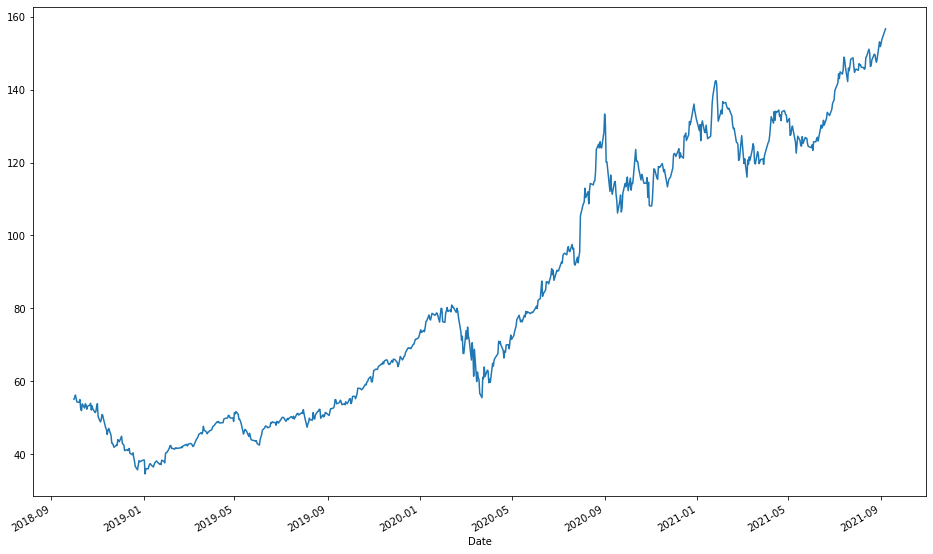

In [19]:
Daily_Closing_Prices["AAPL"].plot(figsize = (16, 10))

> Let's visualize all the stock closing prices against each other.

<AxesSubplot:xlabel='Date'>

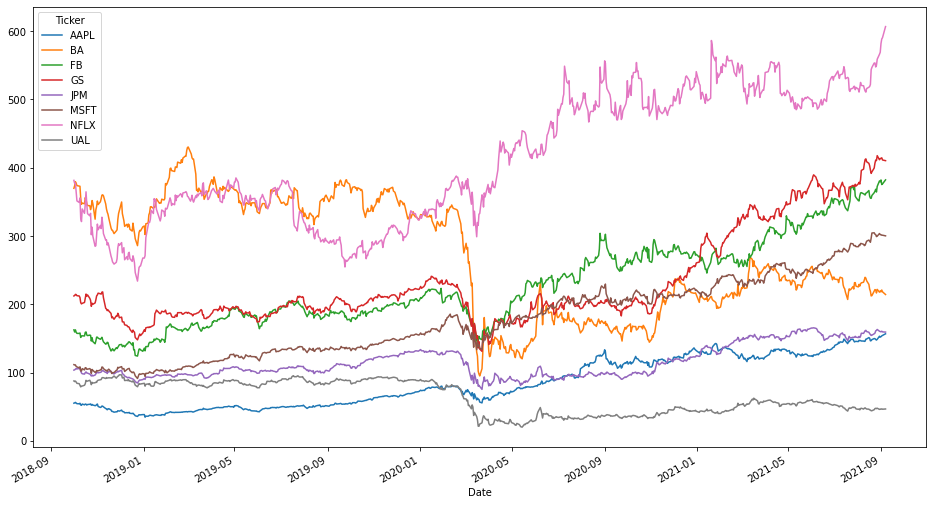

In [20]:
Daily_Closing_Prices.plot(figsize = (16,9))

## Plotting volumes series data

> Let's obtain the daily volumes for Facebook

In [21]:
Daily_Volumns_FB = T8.Volume.loc["FB"]

> Then, let's visualize it

<BarContainer object of 739 artists>

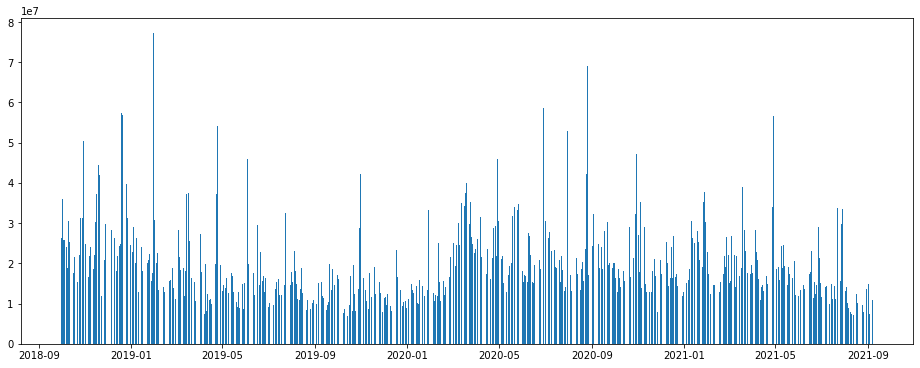

In [22]:
f ,ax = plt.subplots(figsize = (16, 6))
plt.bar(Daily_Volumns_FB.index, Daily_Volumns_FB)

### Combined Price and Volumes

***Quick Homework: please provide prices and volumns together here.***

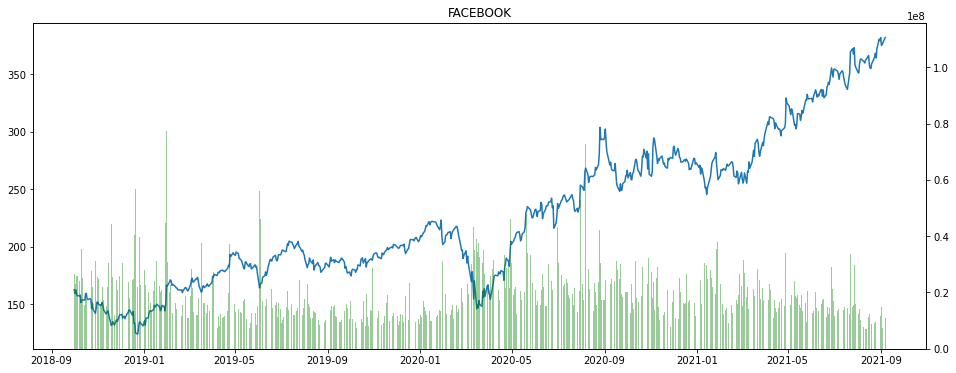

In [23]:
f ,ax1 = plt.subplots(figsize = (16, 6))
ax1.plot(T8.Close.loc["FB"].index, T8.Close.loc["FB"])
plt.title("FACEBOOK")

ax2 = ax1.twinx()

ax2.bar(Daily_Volumns_FB.index, Daily_Volumns_FB, color = "green", alpha = 0.4)
# ax2.axes.yaxis.set_ticklabels([])  # remove the ylabel
ax2.set_ylim(0,Daily_Volumns_FB.max()*1.5)
plt.show()

### Visualizing `candlestick` chart

> A candlestick chart is a powerful chart in finance that shows the starting price, closing price, highest price and lowerst price of a trading day. 

> Let's create a candlestick chart of the stock prices for the S&P 500 over the past 3 years (between 2017 September and 2020 August). 

> You can find Candlestick in the `go` module.

In [24]:
%pip install plotly

     |████████████████████████████████| 23.9 MB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
import plotly.graph_objs as go

> Let's make an object that defines buttons (and what they do)

In [26]:
CLOSE_OT = go.Scatter(x = SP500.Date, y = SP500.Close)

In [27]:
go.Figure(CLOSE_OT)

In [28]:
CS = [go.Candlestick(x = SP500.Date,
                    open = SP500.Open,
                    high = SP500.High,
                    low = SP500.Low,
                    close = SP500.Close)]
go.Figure(CS)

### Caveat

In [29]:
NFLX = T8.loc["NFLX"].reset_index()

POOR_comparison = [go.Scatter(x = SP500.Date, y = SP500.Close, name = "S&P 500"), 
                   go.Scatter(x = NFLX.Date, y = NFLX.Close, name = "NETFLIX")]
go.Figure(POOR_comparison)

In [30]:
# create a menu at upperleft
updatemenus = list([
    dict(active = -1,
         buttons = list([
             dict(label = "NFLX",
                  method = "update",
                  args = [{"visible": [True, False]},
                          {"title": "NETFLIX"}]),
             dict(label = "SP500",
                  method = "update",
                  args = [{"visible": [False, True]},
                          {"title": "S&P 500"}]),
             dict(label = "NFLX + SP500",
                  method = "update",
                  args = [{"visible": [True, True]},
                          {"title": "NETFLIX vs. S&P 500"}]),             
         ]),
        )
])

layout = dict(title = "Comparison of NETFLIX and S&P 500", updatemenus = updatemenus)
f = dict(data = POOR_comparison, layout = layout)

go.Figure(f)

> One of the most important questions in data science practice (in finance) is `"compared with what"`?

> How would you visualize this again in a way that makes the returns of Netflix more easily comparable to the returns of the benchmark S&P 500?

In [31]:
# set two data start from 1, and change into proportion
Better_Comparison = [go.Scatter(x = SP500.Date, y = SP500.Close / SP500.iloc[0]["Close"], name = "S&P 500"),
                     go.Scatter(x = NFLX.Date, y = NFLX.Close / NFLX.iloc[0]["Close"], name = "NETFLIX")
                    ]

In [32]:
LAYOUT_Better_Comparison = dict(title = "This is better", showlegend = True, updatemenus = updatemenus)

F_Better_Comparison = dict(data = Better_Comparison, layout = LAYOUT_Better_Comparison)

go.Figure(F_Better_Comparison)

In [33]:
# set two data start from 0
Another_Comparison = [go.Scatter(x = SP500.Date, y = SP500.Close - SP500.iloc[0]["Close"], name = "S&P 500"),
                     go.Scatter(x = NFLX.Date, y = NFLX.Close - NFLX.iloc[0]["Close"], name = "NETFLIX")
                    ]

In [34]:
LAYOUT_other_Comparison = dict(title = "This is anther comparison", showlegend = True, updatemenus = updatemenus)

F_other_Comparison = dict(data = Another_Comparison, layout = LAYOUT_other_Comparison)

go.Figure(F_other_Comparison)

### Some Fundamental Financial Calculations

#### `Daily percentage change`

> Let's calculate % change from day 0 to day 1

In [35]:
Daily_Closing_Prices

Ticker            AAPL          BA          FB          GS         JPM  \
Date                                                                     
2018-10-01   55.043159  369.762512  162.440002  212.125931  103.504448   
2018-10-02   55.532413  373.708801  159.330002  212.822556  103.933067   
2018-10-03   56.208157  379.444489  162.429993  214.432343  104.908836   
2018-10-04   55.219967  377.210175  158.850006  214.149918  105.854698   
2018-10-05   54.323814  373.805542  157.330002  212.483627  105.257797   
...                ...         ...         ...         ...         ...   
2021-08-31  151.830002  219.500000  379.380005  413.510010  159.949997   
2021-09-01  152.509995  218.119995  382.049988  413.660004  159.720001   
2021-09-02  153.649994  220.830002  375.279999  414.500000  160.460007   
2021-09-03  154.300003  218.169998  376.260010  411.309998  159.490005   
2021-09-07  156.690002  214.240005  382.179993  410.320007  159.210007   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-01  111.516945  381.429993  87.610001  
2018-10-02  111.073219  377.140015  86.709999  
2018-10-03  111.092499  377.049988  87.389999  
2018-10-04  108.796776  363.649994  86.040001  
2018-10-05  108.160133  351.350006  84.139999  
...                ...         ...        ...  
2021-08-31  301.880005  569.190002  46.509998  
2021-09-01  301.829987  582.070007  46.189999  
2021-09-02  301.149994  588.549988  46.759998  
2021-09-03  301.140015  590.530029  46.220001  
2021-09-07  300.179993  606.710022  46.570000  

[739 rows x 8 columns]

In [36]:
Boeing_P_T0 = Daily_Closing_Prices.iloc[0]["BA"] 
Boeing_P_T1 = Daily_Closing_Prices.iloc[1]["BA"] 

Return_T1 = Boeing_P_T1 / Boeing_P_T0 - 1

Boeing_P_T0, Boeing_P_T1, Return_T1

(369.76251220703125, 373.70880126953125, 0.010672496351632477)

> Surely, we can apply this to everything with the following using slices :)

In [37]:
Daily_Percentage_Change = Daily_Closing_Prices.iloc[1: ] / Daily_Closing_Prices.iloc[ : -1].values - 1

In [38]:
Daily_Percentage_Change.loc[:]

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-02  0.008889  0.010672 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012168  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
2018-10-08 -0.002318 -0.001811 -0.000508 -0.001595  0.006107 -0.011415   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.008425  0.008454 -0.003363  0.004640 -0.003054 -0.005633   
2021-09-01  0.004479 -0.006287  0.007038  0.000363 -0.001438 -0.000166   
2021-09-02  0.007475  0.012424 -0.017720  0.002031  0.004633 -0.002253   
2021-09-03  0.004230 -0.012045  0.002611 -0.007696 -0.006045 -0.000033   
2021-09-07  0.015489 -0.018013  0.015734 -0.002407 -0.001756 -0.003188   

Ticker          NFLX       UAL  
Date                            
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
2018-10-08 -0.006404 -0.005467  
...              ...       ...  
2021-08-31  0.005316  0.013069  
2021-09-01  0.022629 -0.006880  
2021-09-02  0.011133  0.012340  
2021-09-03  0.003364 -0.011548  
2021-09-07  0.027399  0.007572  

[738 rows x 8 columns]

> Let's show the DataFrame that is the numerator

In [39]:
Price_Matrix_Minus_Day1 = Daily_Closing_Prices.iloc[1: ]
Price_Matrix_Minus_Day1

Ticker            AAPL          BA          FB          GS         JPM  \
Date                                                                     
2018-10-02   55.532413  373.708801  159.330002  212.822556  103.933067   
2018-10-03   56.208157  379.444489  162.429993  214.432343  104.908836   
2018-10-04   55.219967  377.210175  158.850006  214.149918  105.854698   
2018-10-05   54.323814  373.805542  157.330002  212.483627  105.257797   
2018-10-08   54.197876  373.128479  157.250000  212.144745  105.900627   
...                ...         ...         ...         ...         ...   
2021-08-31  151.830002  219.500000  379.380005  413.510010  159.949997   
2021-09-01  152.509995  218.119995  382.049988  413.660004  159.720001   
2021-09-02  153.649994  220.830002  375.279999  414.500000  160.460007   
2021-09-03  154.300003  218.169998  376.260010  411.309998  159.490005   
2021-09-07  156.690002  214.240005  382.179993  410.320007  159.210007   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-02  111.073219  377.140015  86.709999  
2018-10-03  111.092499  377.049988  87.389999  
2018-10-04  108.796776  363.649994  86.040001  
2018-10-05  108.160133  351.350006  84.139999  
2018-10-08  106.925461  349.100006  83.680000  
...                ...         ...        ...  
2021-08-31  301.880005  569.190002  46.509998  
2021-09-01  301.829987  582.070007  46.189999  
2021-09-02  301.149994  588.549988  46.759998  
2021-09-03  301.140015  590.530029  46.220001  
2021-09-07  300.179993  606.710022  46.570000  

[738 rows x 8 columns]

> Yes, the numerator is a 2d array, but excludes the last day

In [40]:
Daily_Closing_Prices.iloc[ :-1].values

array([[ 55.04315948, 369.76251221, 162.44000244, ..., 111.51694489,
        381.42999268,  87.61000061],
       [ 55.53241348, 373.70880127, 159.33000183, ..., 111.0732193 ,
        377.14001465,  86.70999908],
       [ 56.20815659, 379.44448853, 162.42999268, ..., 111.09249878,
        377.04998779,  87.38999939],
       ...,
       [152.50999451, 218.11999512, 382.04998779, ..., 301.82998657,
        582.07000732,  46.18999863],
       [153.6499939 , 220.83000183, 375.27999878, ..., 301.1499939 ,
        588.54998779,  46.75999832],
       [154.30000305, 218.16999817, 376.26000977, ..., 301.14001465,
        590.5300293 ,  46.22000122]])

> Alternatively, you can use the `shift` function

In [41]:
Daily_Percentage_Change_2 = Daily_Closing_Prices / Daily_Closing_Prices.shift(1) - 1
Daily_Percentage_Change_2.iloc[:,] 

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-10-02  0.008889  0.010672 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012168  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.008425  0.008454 -0.003363  0.004640 -0.003054 -0.005633   
2021-09-01  0.004479 -0.006287  0.007038  0.000363 -0.001438 -0.000166   
2021-09-02  0.007475  0.012424 -0.017720  0.002031  0.004633 -0.002253   
2021-09-03  0.004230 -0.012045  0.002611 -0.007696 -0.006045 -0.000033   
2021-09-07  0.015489 -0.018013  0.015734 -0.002407 -0.001756 -0.003188   

Ticker          NFLX       UAL  
Date                            
2018-10-01       NaN       NaN  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-08-31  0.005316  0.013069  
2021-09-01  0.022629 -0.006880  
2021-09-02  0.011133  0.012340  
2021-09-03  0.003364 -0.011548  
2021-09-07  0.027399  0.007572  

[739 rows x 8 columns]

> In order to make this easy, pandas has `.pct_change()` baked in

In [42]:
Daily_Percentage_Change_3 = Daily_Closing_Prices.pct_change()
Daily_Percentage_Change_3

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-10-02  0.008889  0.010672 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012168  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.008425  0.008454 -0.003363  0.004640 -0.003054 -0.005633   
2021-09-01  0.004479 -0.006287  0.007038  0.000363 -0.001438 -0.000166   
2021-09-02  0.007475  0.012424 -0.017720  0.002031  0.004633 -0.002253   
2021-09-03  0.004230 -0.012045  0.002611 -0.007696 -0.006045 -0.000033   
2021-09-07  0.015489 -0.018013  0.015734 -0.002407 -0.001756 -0.003188   

Ticker          NFLX       UAL  
Date                            
2018-10-01       NaN       NaN  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-08-31  0.005316  0.013069  
2021-09-01  0.022629 -0.006880  
2021-09-02  0.011133  0.012340  
2021-09-03  0.003364 -0.011548  
2021-09-07  0.027399  0.007572  

[739 rows x 8 columns]

> Let's set NaN's to 0 

***use `fillna()` ***

In [43]:
Daily_Percentage_Change_3.fillna(0, inplace = True)

In [44]:
Daily_Percentage_Change_3.iloc[:,:]

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-10-02  0.008889  0.010672 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012168  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.008425  0.008454 -0.003363  0.004640 -0.003054 -0.005633   
2021-09-01  0.004479 -0.006287  0.007038  0.000363 -0.001438 -0.000166   
2021-09-02  0.007475  0.012424 -0.017720  0.002031  0.004633 -0.002253   
2021-09-03  0.004230 -0.012045  0.002611 -0.007696 -0.006045 -0.000033   
2021-09-07  0.015489 -0.018013  0.015734 -0.002407 -0.001756 -0.003188   

Ticker          NFLX       UAL  
Date                            
2018-10-01  0.000000  0.000000  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-08-31  0.005316  0.013069  
2021-09-01  0.022629 -0.006880  
2021-09-02  0.011133  0.012340  
2021-09-03  0.003364 -0.011548  
2021-09-07  0.027399  0.007572  

[739 rows x 8 columns]

## Calculating simple daily cumulative returns

> Let's calculate the cumulative daily returns 

In [45]:
Cumulative_Daily_Return = (1 + Daily_Percentage_Change_3).cumprod()

In [46]:
Cumulative_Daily_Return.iloc[:,]

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-10-02  1.008889  1.010672  0.980854  1.003284  1.004141  0.996021   
2018-10-03  1.021165  1.026184  0.999938  1.010873  1.013568  0.996194   
2018-10-04  1.003212  1.020142  0.977900  1.009541  1.022707  0.975608   
2018-10-05  0.986931  1.010934  0.968542  1.001686  1.016940  0.969899   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  2.758381  0.593624  2.335508  1.949361  1.545344  2.707033   
2021-09-01  2.770735  0.589892  2.351945  1.950068  1.543122  2.706584   
2021-09-02  2.791446  0.597221  2.310268  1.954028  1.550272  2.700486   
2021-09-03  2.803255  0.590027  2.316301  1.938990  1.540900  2.700397   
2021-09-07  2.846675  0.579399  2.352746  1.934323  1.538195  2.691788   

Ticker          NFLX       UAL  
Date                            
2018-10-01  1.000000  1.000000  
2018-10-02  0.988753  0.989727  
2018-10-03  0.988517  0.997489  
2018-10-04  0.953386  0.982080  
2018-10-05  0.921139  0.960393  
...              ...       ...  
2021-08-31  1.492253  0.530875  
2021-09-01  1.526021  0.527223  
2021-09-02  1.543009  0.533729  
2021-09-03  1.548200  0.527565  
2021-09-07  1.590620  0.531560  

[739 rows x 8 columns]

> Let's visualize all the cumulative returns

<AxesSubplot:xlabel='Date'>

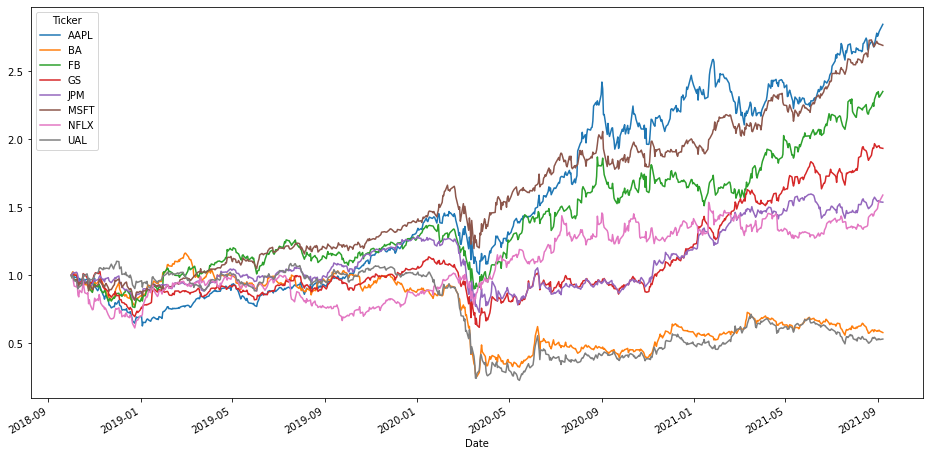

In [47]:
Cumulative_Daily_Return.plot(figsize = (16, 8))

### The Analysis on Distribution of Returns

> Let's visualize daily % change values histogram for GS using 50 bins

In [48]:
GS = Daily_Percentage_Change_3["GS"]
GS

Date
2018-10-01    0.000000
2018-10-02    0.003284
2018-10-03    0.007564
2018-10-04   -0.001317
2018-10-05   -0.007781
                ...   
2021-08-31    0.004640
2021-09-01    0.000363
2021-09-02    0.002031
2021-09-03   -0.007696
2021-09-07   -0.002407
Name: GS, Length: 739, dtype: float64

<AxesSubplot:>

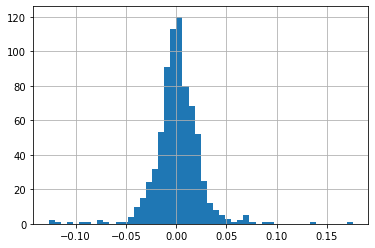

In [49]:
GS.hist(bins = 50)

> Let's see descriptive statistics

In [50]:
GS.describe()

count    739.000000
mean       0.001165
std        0.023336
min       -0.127053
25%       -0.009319
50%        0.001028
75%        0.012280
max        0.175803
Name: GS, dtype: float64

> You can reset the percentile.

In [51]:
GS.describe(percentiles = [0.02, 0.5, 0.975])

count    739.000000
mean       0.001165
std        0.023336
min       -0.127053
2%        -0.042136
50%        0.001028
97.5%      0.044463
max        0.175803
Name: GS, dtype: float64

> Let's visualize all the cumulative return distributions

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'BA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'JPM'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'NFLX'}>,
        <AxesSubplot:title={'center':'UAL'}>, <AxesSubplot:>]],
      dtype=object)

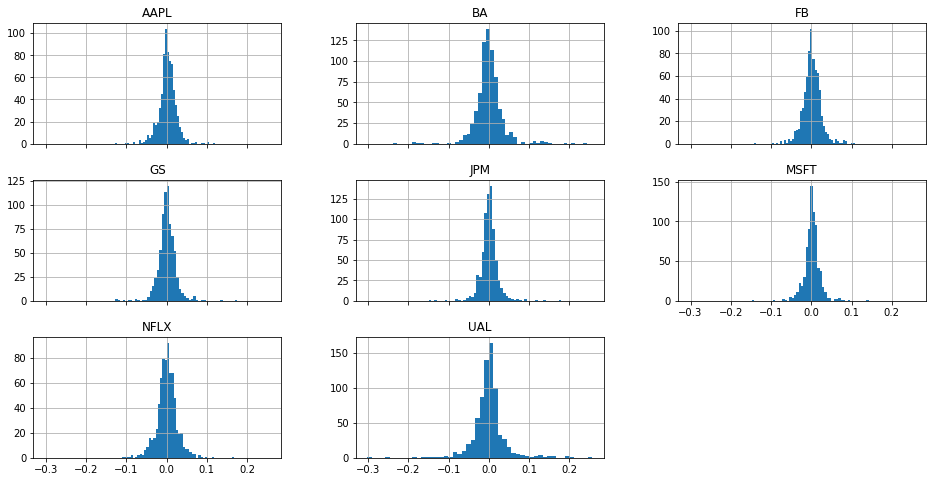

In [52]:
Daily_Percentage_Change_3.hist(bins = 50,
                              figsize = (16, 8),
                              sharex = True)

### QQ-Plots

> create a qq-plot of GS returns vs normal distribution

In [53]:
import scipy.stats as stats

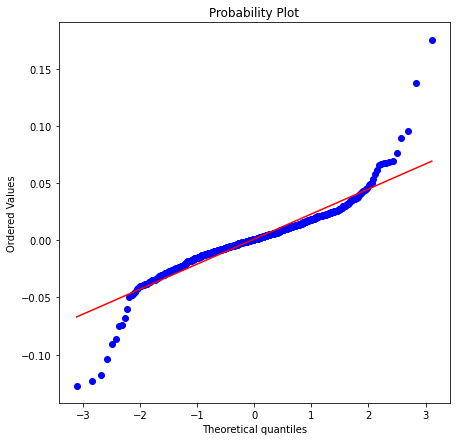

In [54]:
f = plt.figure(figsize = (7, 7))
ax = f.add_subplot(111)

stats.probplot(GS, dist = "norm", plot = ax)
plt.show()

### Box and whisker plots

> Let's visualize a boxplot for the GS returns

<AxesSubplot:>

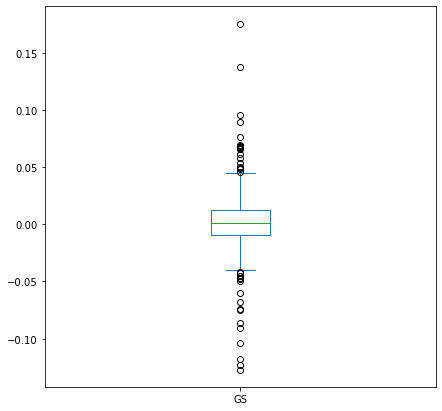

In [55]:
Daily_Percentage_Change_3[["GS"]].plot(kind = "box", figsize = (7,7))

> Now, let's examine all the returns. 

<AxesSubplot:>

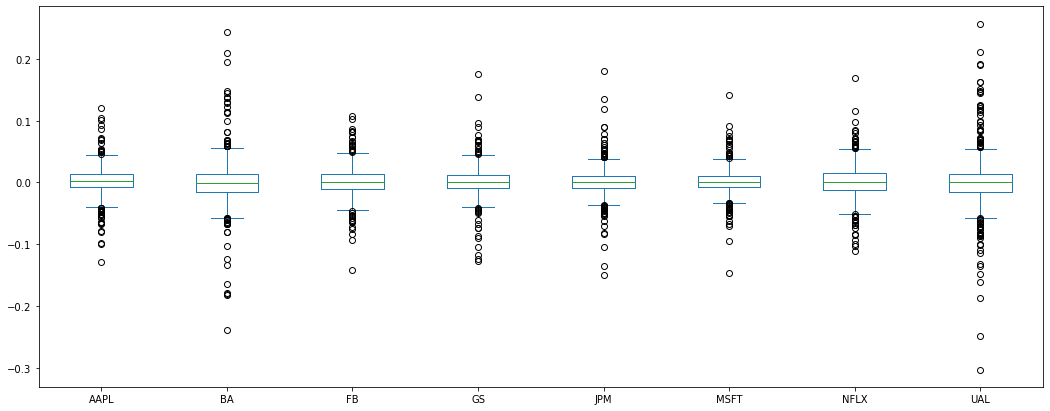

In [56]:
Daily_Percentage_Change_3.plot(kind = "box", figsize = (18,7))

### Comparison of daily percentage change between stocks

In [57]:
def QF627_scatter(data,
                  x_stock_name,
                  y_stock_name,
                  xlim = None,
                  ylim = None):

    f = plt.figure(figsize = (8, 8))
    ax = f.add_subplot(111)
    
    ax.scatter(data[x_stock_name], 
               data[y_stock_name],
               alpha = 0.20)
    
    ax.hlines(0, -10, 10, color = "grey")
    ax.vlines(0, -10, 10, color = "grey")
    
    if xlim is not None: 
        ax.set_xlim(xlim)
    if ylim is not None: 
        ax.set_ylim(ylim)        
    ax.autoscale(False)
    
    ax.plot((-10, 10), (-10, 10), color = "red") # Where you set your benchmark
    
    ax.set_xlabel(x_stock_name)   
    ax.set_ylabel(y_stock_name)

##### Netflix vs. Boeing?

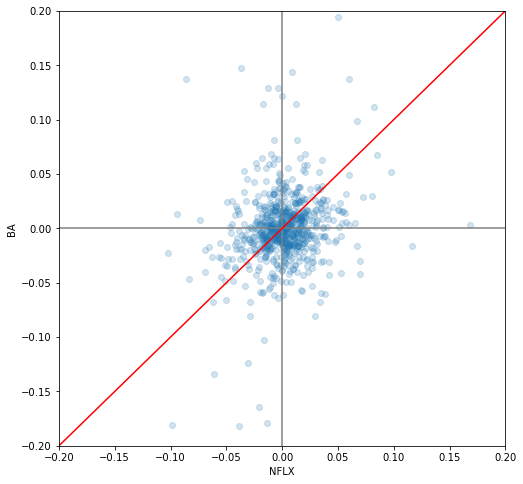

In [58]:
QF627_scatter(Daily_Percentage_Change_3,
             "NFLX",
             "BA",
             xlim = (-0.20, 0.20),
             ylim = (-0.20, 0.20))

##### Goldman Sachs vs. JP Morgan Chase?

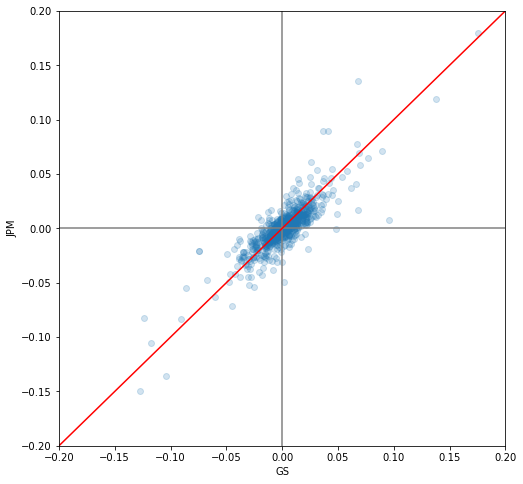

In [59]:
QF627_scatter(Daily_Percentage_Change_3,
             "GS",
             "JPM",
             xlim = (-0.20, 0.20),
             ylim = (-0.20, 0.20))

### Let's look at all stocks against each other, with a Kernel Density Estimation (KDE) in the diagonal

Conditions of Kernels:

$$ K(x) \geq 0, \int K(x) dx = 1, \int xK(X)dx = 0 $$

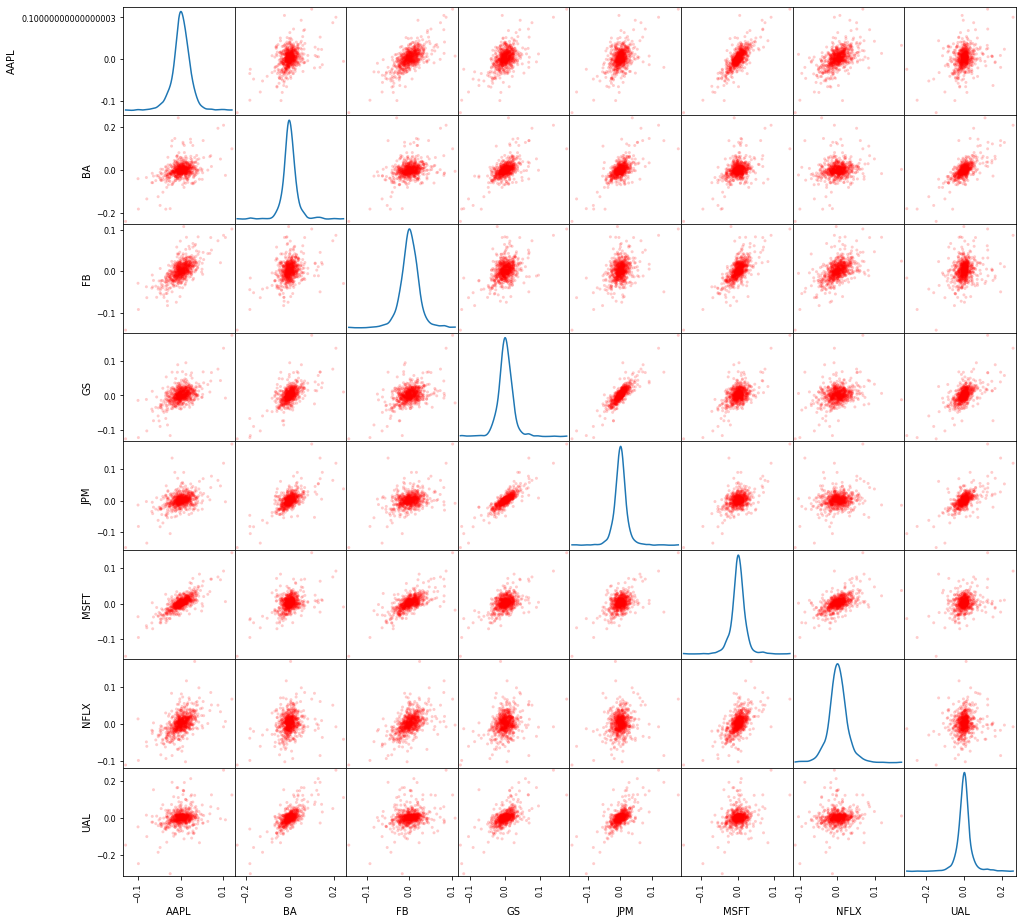

In [60]:
pd.plotting.scatter_matrix(Daily_Percentage_Change_3,
                          diagonal = "kde",
                          color = "red",
                          alpha = 0.20,
                          figsize = (16, 16))
plt.show()

### Moving Windows

In [61]:
Daily_Closing_Prices

Ticker            AAPL          BA          FB          GS         JPM  \
Date                                                                     
2018-10-01   55.043159  369.762512  162.440002  212.125931  103.504448   
2018-10-02   55.532413  373.708801  159.330002  212.822556  103.933067   
2018-10-03   56.208157  379.444489  162.429993  214.432343  104.908836   
2018-10-04   55.219967  377.210175  158.850006  214.149918  105.854698   
2018-10-05   54.323814  373.805542  157.330002  212.483627  105.257797   
...                ...         ...         ...         ...         ...   
2021-08-31  151.830002  219.500000  379.380005  413.510010  159.949997   
2021-09-01  152.509995  218.119995  382.049988  413.660004  159.720001   
2021-09-02  153.649994  220.830002  375.279999  414.500000  160.460007   
2021-09-03  154.300003  218.169998  376.260010  411.309998  159.490005   
2021-09-07  156.690002  214.240005  382.179993  410.320007  159.210007   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-01  111.516945  381.429993  87.610001  
2018-10-02  111.073219  377.140015  86.709999  
2018-10-03  111.092499  377.049988  87.389999  
2018-10-04  108.796776  363.649994  86.040001  
2018-10-05  108.160133  351.350006  84.139999  
...                ...         ...        ...  
2021-08-31  301.880005  569.190002  46.509998  
2021-09-01  301.829987  582.070007  46.189999  
2021-09-02  301.149994  588.549988  46.759998  
2021-09-03  301.140015  590.530029  46.220001  
2021-09-07  300.179993  606.710022  46.570000  

[739 rows x 8 columns]

### Moving average: 

> One of the analyses you can first look at is moving averages (MA), which is commonly used to identify trading opportunities. 

> It is calculated by taking the mean or average of the past data points of the prices. 

> It is called a moving average, as opposed to just an average, because the data set is continuously “moving”: the oldest data points are dropped from the data set to account for the new data as they become available.

> The moving average graph is a smooth line that follows the day-to-day values of the prices we are tracking but it has some lags. 

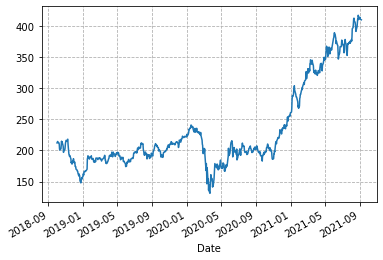

In [62]:
GS = Daily_Closing_Prices["GS"]
GS.plot()
plt.grid(linestyle='--')

- Depending on the type of investor or trader (e.g., short-term vs. long-term; high risk vs. low risk trading), you may adjust your `moving time average` (10 days, 20 days, 50 days, 200 days, 1 year, 5 years, etc). 


- The two widely MAs that traders and investors used are 50-day MA and 200-day MA.

> Which moving average (50-day MA or 200-day MA) do you think will have a greater degree of lag?

> answer: 200-day MA

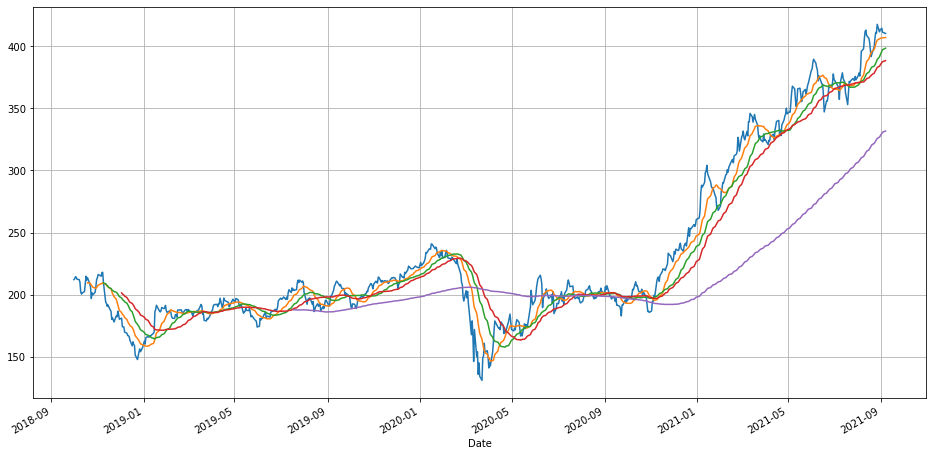

In [63]:
GS.plot(figsize = (16,8))
GS.rolling(15).mean().plot(figsize = (16,8))
GS.rolling(30).mean().plot(figsize = (16,8))
GS.rolling(45).mean().plot(figsize = (16,8))
GS.rolling(200).mean().plot(figsize = (16,8))
plt.grid()

<AxesSubplot:xlabel='Date'>

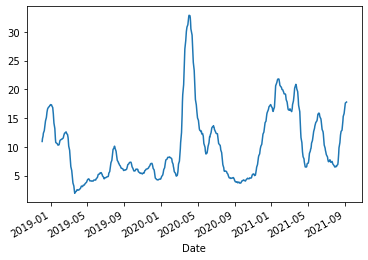

In [64]:
MAD = lambda x: np.fabs(x - x.mean()).mean()
GS.rolling(45).apply(MAD).plot()

### Volatility Calculation

> Let's use a minimum of 80 days

In [65]:
minimum_period = 80

> Let's calculate the rolling standard deviation

In [66]:
Daily_Percentage_Change_3

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-10-02  0.008889  0.010672 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012168  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.008425  0.008454 -0.003363  0.004640 -0.003054 -0.005633   
2021-09-01  0.004479 -0.006287  0.007038  0.000363 -0.001438 -0.000166   
2021-09-02  0.007475  0.012424 -0.017720  0.002031  0.004633 -0.002253   
2021-09-03  0.004230 -0.012045  0.002611 -0.007696 -0.006045 -0.000033   
2021-09-07  0.015489 -0.018013  0.015734 -0.002407 -0.001756 -0.003188   

Ticker          NFLX       UAL  
Date                            
2018-10-01  0.000000  0.000000  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-08-31  0.005316  0.013069  
2021-09-01  0.022629 -0.006880  
2021-09-02  0.011133  0.012340  
2021-09-03  0.003364 -0.011548  
2021-09-07  0.027399  0.007572  

[739 rows x 8 columns]

> Let's visualize it

In [67]:
volatility = Daily_Percentage_Change_3.rolling(minimum_period).std() * np.sqrt(minimum_period)

## Rolling correlation of returns

> Rolling correlation of Boeing and United Airlines

<AxesSubplot:xlabel='Date'>

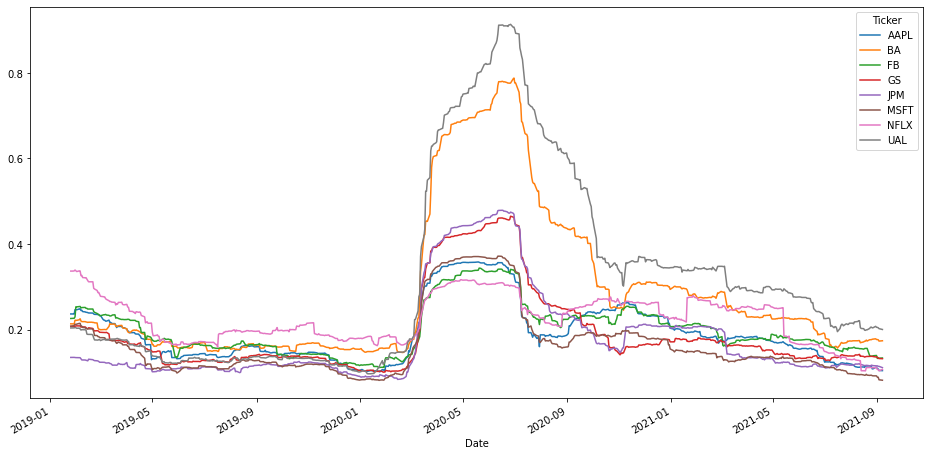

In [68]:
volatility.plot(figsize = (16,8))

> Let's visualize the rolling correlation

In [71]:
Daily_Closing_Prices["BA"].rolling(20)

Rolling [window=20,center=False,axis=0,method=single]

In [77]:
ROLL_CORR = Daily_Closing_Prices["BA"].rolling(20).corr(Daily_Closing_Prices["UAL"]).dropna()
ROLL_CORR

Date
2018-10-26    0.120950
2018-10-29    0.043541
2018-10-30   -0.037559
2018-10-31   -0.168966
2018-11-01   -0.246005
                ...   
2021-08-31    0.642743
2021-09-01    0.666369
2021-09-02    0.648313
2021-09-03    0.628067
2021-09-07    0.615268
Length: 720, dtype: float64

<AxesSubplot:xlabel='Date'>

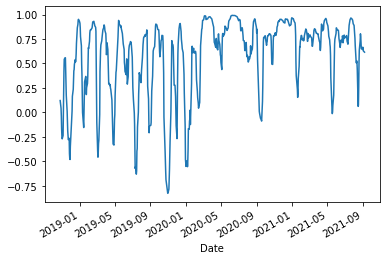

In [78]:
ROLL_CORR.plot()

## Least squares regression of returns (beta)

> Let's regress the returns of GS onto JPM, using `Ordinary least squares` method.

In [80]:
!pip install statsmodels

In [81]:
!pip install --upgrade statsmodels

In [79]:
import statsmodels.api as sm

In [82]:
Input_Feature = sm.add_constant(Daily_Percentage_Change_3["GS"])

Model = sm.OLS(Daily_Percentage_Change_3["JPM"], Input_Feature).fit()

# print model parameters
print(Model.params)

# print R-squared
print(Model.rsquared)

print(str(Model.summary()))


const   -0.000133
GS       0.833007
dtype: float64
0.7382553293789836
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     2079.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):          1.05e-216
Time:                        12:57:02   Log-Likelihood:                 2247.0
No. Observations:                 739   AIC:                            -4490.
Df Residuals:                     737   BIC:                            -4481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [83]:
for ATTRIBUTES in dir(Model):
    if not ATTRIBUTES.startswith("_"):
        print(ATTRIBUTES)
        
# se: standard error, sandwich model

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


# Comparing stocks to the S&P 500

> Let's calculate the percentage change on the close for S&P 500

In [84]:
SP_500 = web.DataReader("^GSPC","yahoo",start, end)
SP_500["Adj Close"]

Date
2018-10-01    2924.590088
2018-10-02    2923.429932
2018-10-03    2925.510010
2018-10-04    2901.610107
2018-10-05    2885.570068
                 ...     
2021-08-31    4522.680176
2021-09-01    4524.089844
2021-09-02    4536.950195
2021-09-03    4535.430176
2021-09-07    4520.029785
Name: Adj Close, Length: 739, dtype: float64

In [85]:
SP_500_Daily_Percentage_Change = SP_500["Adj Close"].pct_change()
SP_500_Daily_Percentage_Change

Date
2018-10-01         NaN
2018-10-02   -0.000397
2018-10-03    0.000712
2018-10-04   -0.008169
2018-10-05   -0.005528
                ...   
2021-08-31   -0.001349
2021-09-01    0.000312
2021-09-02    0.002843
2021-09-03   -0.000335
2021-09-07   -0.003396
Name: Adj Close, Length: 739, dtype: float64

> Then, let's concat the S&P data with the other daily pct values

In [86]:
DPC_all = pd.concat([SP_500_Daily_Percentage_Change, Daily_Percentage_Change_3], axis = 1)
DPC_all.rename(columns = {"Adj Close": "S&P 500"}, inplace = True)
DPC_all

S&P 500      AAPL        BA        FB        GS       JPM  \
Date                                                                     
2018-10-01       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-10-02 -0.000397  0.008889  0.010672 -0.019146  0.003284  0.004141   
2018-10-03  0.000712  0.012168  0.015348  0.019456  0.007564  0.009388   
2018-10-04 -0.008169 -0.017581 -0.005888 -0.022040 -0.001317  0.009016   
2018-10-05 -0.005528 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639   
...              ...       ...       ...       ...       ...       ...   
2021-08-31 -0.001349 -0.008425  0.008454 -0.003363  0.004640 -0.003054   
2021-09-01  0.000312  0.004479 -0.006287  0.007038  0.000363 -0.001438   
2021-09-02  0.002843  0.007475  0.012424 -0.017720  0.002031  0.004633   
2021-09-03 -0.000335  0.004230 -0.012045  0.002611 -0.007696 -0.006045   
2021-09-07 -0.003396  0.015489 -0.018013  0.015734 -0.002407 -0.001756   

                MSFT      NFLX       UAL  
Date                                      
2018-10-01  0.000000  0.000000  0.000000  
2018-10-02 -0.003979 -0.011247 -0.010273  
2018-10-03  0.000174 -0.000239  0.007842  
2018-10-04 -0.020665 -0.035539 -0.015448  
2018-10-05 -0.005852 -0.033824 -0.022083  
...              ...       ...       ...  
2021-08-31 -0.005633  0.005316  0.013069  
2021-09-01 -0.000166  0.022629 -0.006880  
2021-09-02 -0.002253  0.011133  0.012340  
2021-09-03 -0.000033  0.003364 -0.011548  
2021-09-07 -0.003188  0.027399  0.007572  

[739 rows x 9 columns]

> Let's calculate the cumulative, from all the daily.

In [87]:
Cumulative_Daily_Returns = (1 + DPC_all).cumprod()
Cumulative_Daily_Returns.fillna(0,inplace = True)
Cumulative_Daily_Returns

S&P 500      AAPL        BA        FB        GS       JPM  \
Date                                                                     
2018-10-01  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-10-02  0.999603  1.008889  1.010672  0.980854  1.003284  1.004141   
2018-10-03  1.000315  1.021165  1.026184  0.999938  1.010873  1.013568   
2018-10-04  0.992142  1.003212  1.020142  0.977900  1.009541  1.022707   
2018-10-05  0.986658  0.986931  1.010934  0.968542  1.001686  1.016940   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  1.546432  2.758381  0.593624  2.335508  1.949361  1.545344   
2021-09-01  1.546914  2.770735  0.589892  2.351945  1.950068  1.543122   
2021-09-02  1.551311  2.791446  0.597221  2.310268  1.954028  1.550272   
2021-09-03  1.550792  2.803255  0.590027  2.316301  1.938990  1.540900   
2021-09-07  1.545526  2.846675  0.579399  2.352746  1.934323  1.538195   

                MSFT      NFLX       UAL  
Date                                      
2018-10-01  1.000000  1.000000  1.000000  
2018-10-02  0.996021  0.988753  0.989727  
2018-10-03  0.996194  0.988517  0.997489  
2018-10-04  0.975608  0.953386  0.982080  
2018-10-05  0.969899  0.921139  0.960393  
...              ...       ...       ...  
2021-08-31  2.707033  1.492253  0.530875  
2021-09-01  2.706584  1.526021  0.527223  
2021-09-02  2.700486  1.543009  0.533729  
2021-09-03  2.700397  1.548200  0.527565  
2021-09-07  2.691788  1.590620  0.531560  

[739 rows x 9 columns]

> Let's calculate the correlations

In [88]:
Daily_Percentage_Change_CORRs = Cumulative_Daily_Returns.corr()
Daily_Percentage_Change_CORRs

S&P 500      AAPL        BA        FB        GS       JPM      MSFT  \
S&P 500  1.000000  0.913248 -0.389962  0.946501  0.919295  0.861011  0.925219   
AAPL     0.913248  1.000000 -0.661504  0.949586  0.787584  0.681035  0.974201   
BA      -0.389962 -0.661504  1.000000 -0.535937 -0.205869 -0.037344 -0.660490   
FB       0.946501  0.949586 -0.535937  1.000000  0.848981  0.741958  0.968563   
GS       0.919295  0.787584 -0.205869  0.848981  1.000000  0.941264  0.819534   
JPM      0.861011  0.681035 -0.037344  0.741958  0.941264  1.000000  0.708741   
MSFT     0.925219  0.974201 -0.660490  0.968563  0.819534  0.708741  1.000000   
NFLX     0.791799  0.915420 -0.704060  0.864798  0.651898  0.490239  0.895567   
UAL     -0.419802 -0.686220  0.968136 -0.570126 -0.232349 -0.040016 -0.687158   

             NFLX       UAL  
S&P 500  0.791799 -0.419802  
AAPL     0.915420 -0.686220  
BA      -0.704060  0.968136  
FB       0.864798 -0.570126  
GS       0.651898 -0.232349  
JPM      0.490239 -0.040016  
MSFT     0.895567 -0.687158  
NFLX     1.000000 -0.768874  
UAL     -0.768874  1.000000

> Let's see how well did each stock relate to the S&P 500

In [89]:
Daily_Percentage_Change_CORRs.loc["S&P 500"]

S&P 500    1.000000
AAPL       0.913248
BA        -0.389962
FB         0.946501
GS         0.919295
JPM        0.861011
MSFT       0.925219
NFLX       0.791799
UAL       -0.419802
Name: S&P 500, dtype: float64

> Let's plot Netflix and Goldman Sachs against S&P500

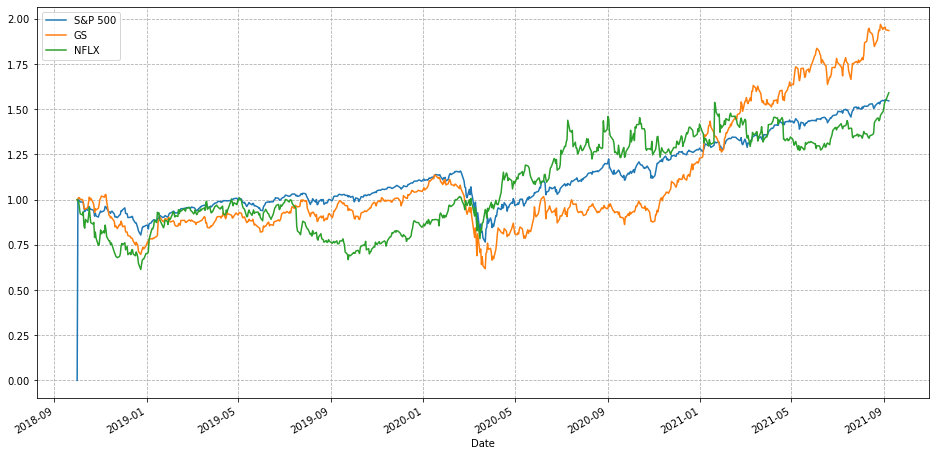

In [90]:
Cumulative_Daily_Returns[["S&P 500", "GS", "NFLX"]].plot(figsize = (16,8))
plt.grid(linestyle='--')

> Goldman Sachs vs S&P 500

In [91]:
import seaborn as sns

In [92]:
!pip install --upgrade seaborn

     |████████████████████████████████| 292 kB 3.1 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [93]:
sns.__version__

'0.11.1'

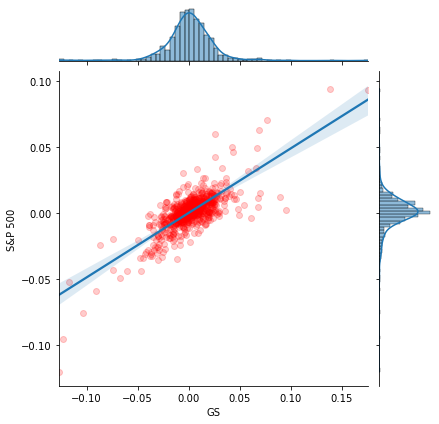

In [95]:
sns.jointplot(x = "GS",
              y = "S&P 500",
              data = DPC_all,
              kind = "reg",
              scatter_kws = {"color": "red", "alpha": 0.2})

> Netflix vs S&P 500

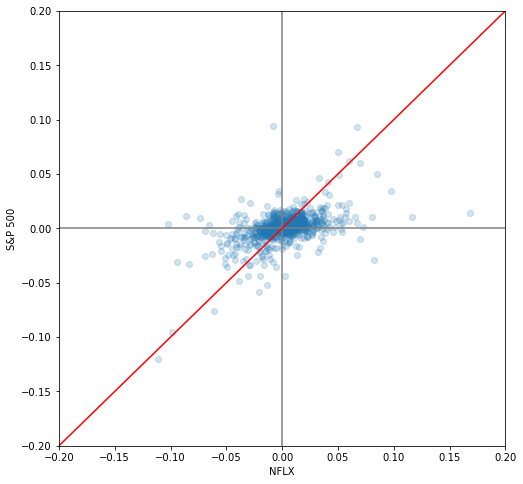

In [96]:
QF627_scatter(DPC_all, "NFLX", "S&P 500",
              xlim = (-0.2, 0.2),
              ylim = (-0.2, 0.2)
             )

> `Thank you for working with the script :)`

# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

> Let's set some print option.

In [2]:
pd.set_option("display.min_rows", 25)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 15)
pd.set_option("precision", 3)

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` module.

In [3]:
import pandas_datareader.data as web

> Let's start & end dates--we are interested in year 2021 until August.

In [4]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [5]:
apple = web.DataReader("AAPL", "yahoo", start, end)
google = web.DataReader("GOOGL", "yahoo", start, end)

> You may save the data to csv files.

In [6]:
apple.to_csv("apple_2021_stock.csv")
google.to_csv("google_2021_stock.csv")

> Let's read the stored files.

In [7]:
apple_2021 = pd.read_csv("apple_2021_stock.csv", index_col=0, parse_dates=True)
google_2021 = pd.read_csv("google_2021_stock.csv", index_col=0, parse_dates=True)

#### Have a quick look at your data.

In [8]:
apple.head()

High     Low    Open   Close     Volume  Adj Close
Date                                                            
2020-12-31  134.74  131.72  134.08  132.69  9.912e+07    132.069
2021-01-04  133.61  126.76  133.52  129.41  1.433e+08    128.805
2021-01-05  131.74  128.43  128.89  131.01  9.766e+07    130.397
2021-01-06  131.05  126.38  127.72  126.60  1.551e+08    126.008
2021-01-07  131.63  127.86  128.36  130.92  1.096e+08    130.308

In [9]:
google.head()

High      Low     Open    Close   Volume  Adj Close
Date                                                              
2020-12-31  1757.50  1736.09  1737.27  1752.64  1053500    1752.64
2021-01-04  1762.49  1707.14  1760.00  1726.13  1866200    1726.13
2021-01-05  1746.83  1716.90  1725.09  1740.05  1018000    1740.05
2021-01-06  1743.97  1696.10  1700.26  1722.88  2329400    1722.88
2021-01-07  1777.82  1726.76  1726.76  1774.34  2096800    1774.34

In [10]:
apple.describe()

High      Low     Open    Close     Volume  Adj Close
count  168.000  168.000  168.000  168.000  1.680e+02    168.000
mean   134.834  132.099  133.469  133.531  9.174e+07    133.213
std      9.059    9.125    9.012    9.191  2.796e+07      9.267
min    120.400  116.210  119.030  116.360  4.640e+07    115.989
25%    127.590  125.130  126.393  126.083  7.187e+07    125.786
50%    133.585  130.435  132.145  132.030  8.858e+07    131.556
75%    144.062  140.155  141.873  142.157  1.056e+08    141.915
max    153.490  151.290  152.660  153.120  1.855e+08    153.120

In [11]:
google.describe()

High       Low      Open     Close     Volume  Adj Close
count   168.000   168.000   168.000   168.000  1.680e+02    168.000
mean   2305.031  2264.523  2283.471  2286.901  1.539e+06   2286.901
std     293.871   298.824   297.770   297.533  6.738e+05    297.533
min    1743.970  1696.100  1700.260  1722.880  7.151e+05   1722.880
25%    2082.333  2033.920  2057.647  2057.770  1.113e+06   2057.770
50%    2306.900  2266.185  2294.245  2290.370  1.328e+06   2290.370
75%    2473.452  2449.797  2456.250  2460.930  1.714e+06   2460.930
max    2919.410  2885.620  2902.940  2893.950  4.894e+06   2893.950

### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2021

In [12]:
apple_07 = apple.loc["2021-07"][["Adj Close"]]
apple_08 = apple.loc["2021-08"][["Adj Close"]]

In [13]:
apple_07.head()

Adj Close
Date                 
2021-07-01    137.065
2021-07-02    139.751
2021-07-06    141.808
2021-07-07    144.354
2021-07-08    143.026

In [14]:
apple_08.head()

Adj Close
Date                 
2021-08-02    145.302
2021-08-03    147.140
2021-08-04    146.730
2021-08-05    146.840
2021-08-06    146.140

### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [15]:
apple_07.iloc[:3].append(apple_08.iloc[:3])

Adj Close
Date                 
2021-07-01    137.065
2021-07-02    139.751
2021-07-06    141.808
2021-08-02    145.302
2021-08-03    147.140
2021-08-04    146.730

In [20]:
pd.concat([apple_07.head(3), apple_08.head(3)])

Adj Close
Date                 
2021-07-01    137.065
2021-07-02    139.751
2021-07-06    141.808
2021-08-02    145.302
2021-08-03    147.140
2021-08-04    146.730

#### Question 1-2. How would you extract only the 2021 August GOOGL values?

In [16]:
google_08 = google.loc["2021-08"][["Adj Close"]]
google_08

Adj Close
Date                 
2021-08-02    2697.09
2021-08-03    2712.60
2021-08-04    2702.51
2021-08-05    2725.03
2021-08-06    2714.77
2021-08-09    2738.26
2021-08-10    2736.14
2021-08-11    2725.58
2021-08-12    2743.88
2021-08-13    2754.55
2021-08-16    2766.19
2021-08-17    2733.23
2021-08-18    2708.98
2021-08-19    2713.60
2021-08-20    2748.59
2021-08-23    2800.83
2021-08-24    2825.23
2021-08-25    2841.58
2021-08-26    2828.81
2021-08-27    2880.08
2021-08-30    2891.81
2021-08-31    2893.95

#### Question 1-3. Please concatenate the AAPL and GOOGL 2021 August stock data--there will be duplicate index labels

In [23]:
DUP = pd.concat([apple_08[:3],google_08[:3]])
DUP

Adj Close
Date                 
2021-08-02    145.302
2021-08-03    147.140
2021-08-04    146.730
2021-08-02   2697.090
2021-08-03   2712.600
2021-08-04   2702.510

> Let's see the `two records for data of 2021-08-03`

In [24]:
DUP.loc["2021-08-03"]

Adj Close
Date                 
2021-08-03     147.14
2021-08-03    2712.60

#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [26]:
AC = pd.concat([apple_08[:3],google_08[:3]],
               keys = ["AAPL", "GOOGL"])
AC

Adj Close
      Date                 
AAPL  2021-08-02    145.302
      2021-08-03    147.140
      2021-08-04    146.730
GOOGL 2021-08-02   2697.090
      2021-08-03   2712.600
      2021-08-04   2702.510

> Let's extract just GOOGL values using `.loc`

In [27]:
AC.loc["GOOGL"]

Adj Close
Date                 
2021-08-02    2697.09
2021-08-03    2712.60
2021-08-04    2702.51

#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [30]:
APPLE_CV = apple[["Adj Close", "Volume"]]
GOOGLE_CV = google[["Adj Close", "Volume"]]
pd.concat([APPLE_CV, GOOGLE_CV])

Adj Close     Volume
Date                            
2020-12-31    132.069  9.912e+07
2021-01-04    128.805  1.433e+08
2021-01-05    130.397  9.766e+07
2021-01-06    126.008  1.551e+08
2021-01-07    130.308  1.096e+08
2021-01-08    131.432  1.052e+08
2021-01-11    128.377  1.004e+08
2021-01-12    128.198  9.195e+07
2021-01-13    130.278  8.864e+07
2021-01-14    128.307  9.022e+07
2021-01-15    126.545  1.116e+08
2021-01-19    127.232  9.076e+07
...               ...        ...
2021-08-16   2766.190  1.119e+06
2021-08-17   2733.230  1.086e+06
2021-08-18   2708.980  9.629e+05
2021-08-19   2713.600  1.089e+06
2021-08-20   2748.590  1.559e+06
2021-08-23   2800.830  1.423e+06
2021-08-24   2825.230  9.634e+05
2021-08-25   2841.580  7.924e+05
2021-08-26   2828.810  1.030e+06
2021-08-27   2880.080  1.439e+06
2021-08-30   2891.810  1.222e+06
2021-08-31   2893.950  1.122e+06

[336 rows x 2 columns]

> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [31]:
GOOGLE_C = google[["Adj Close"]]
pd.concat([APPLE_CV, GOOGLE_C])

Adj Close     Volume
Date                            
2020-12-31    132.069  9.912e+07
2021-01-04    128.805  1.433e+08
2021-01-05    130.397  9.766e+07
2021-01-06    126.008  1.551e+08
2021-01-07    130.308  1.096e+08
2021-01-08    131.432  1.052e+08
2021-01-11    128.377  1.004e+08
2021-01-12    128.198  9.195e+07
2021-01-13    130.278  8.864e+07
2021-01-14    128.307  9.022e+07
2021-01-15    126.545  1.116e+08
2021-01-19    127.232  9.076e+07
...               ...        ...
2021-08-16   2766.190        NaN
2021-08-17   2733.230        NaN
2021-08-18   2708.980        NaN
2021-08-19   2713.600        NaN
2021-08-20   2748.590        NaN
2021-08-23   2800.830        NaN
2021-08-24   2825.230        NaN
2021-08-25   2841.580        NaN
2021-08-26   2828.810        NaN
2021-08-27   2880.080        NaN
2021-08-30   2891.810        NaN
2021-08-31   2893.950        NaN

[336 rows x 2 columns]

### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [32]:
pd.concat([APPLE_CV, GOOGLE_C], join = "inner")

Adj Close
Date                 
2020-12-31    132.069
2021-01-04    128.805
2021-01-05    130.397
2021-01-06    126.008
2021-01-07    130.308
2021-01-08    131.432
2021-01-11    128.377
2021-01-12    128.198
2021-01-13    130.278
2021-01-14    128.307
2021-01-15    126.545
2021-01-19    127.232
...               ...
2021-08-16   2766.190
2021-08-17   2733.230
2021-08-18   2708.980
2021-08-19   2713.600
2021-08-20   2748.590
2021-08-23   2800.830
2021-08-24   2825.230
2021-08-25   2841.580
2021-08-26   2828.810
2021-08-27   2880.080
2021-08-30   2891.810
2021-08-31   2893.950

[336 rows x 1 columns]

#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [33]:
APPLE_C = apple[["Adj Close"]]

In [34]:
AC = pd.concat([APPLE_C, GOOGLE_C],
                axis = 1)
AC

Adj Close  Adj Close
Date                            
2020-12-31    132.069    1752.64
2021-01-04    128.805    1726.13
2021-01-05    130.397    1740.05
2021-01-06    126.008    1722.88
2021-01-07    130.308    1774.34
2021-01-08    131.432    1797.83
2021-01-11    128.377    1756.29
2021-01-12    128.198    1737.43
2021-01-13    130.278    1747.25
2021-01-14    128.307    1730.92
2021-01-15    126.545    1727.62
2021-01-19    127.232    1784.47
...               ...        ...
2021-08-16    151.120    2766.19
2021-08-17    150.190    2733.23
2021-08-18    146.360    2708.98
2021-08-19    146.700    2713.60
2021-08-20    148.190    2748.59
2021-08-23    149.710    2800.83
2021-08-24    149.620    2825.23
2021-08-25    148.360    2841.58
2021-08-26    147.540    2828.81
2021-08-27    148.600    2880.08
2021-08-30    153.120    2891.81
2021-08-31    151.830    2893.95

[168 rows x 2 columns]

#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [37]:
pd.concat([APPLE_CV[:5], GOOGLE_CV[:3]],
          axis = 1,
          keys = ["APPLE", "GOOGL"])

APPLE                GOOGL           
           Adj Close     Volume Adj Close     Volume
Date                                                
2020-12-31   132.069  9.912e+07   1752.64  1.054e+06
2021-01-04   128.805  1.433e+08   1726.13  1.866e+06
2021-01-05   130.397  9.766e+07   1740.05  1.018e+06
2021-01-06   126.008  1.551e+08       NaN        NaN
2021-01-07   130.308  1.096e+08       NaN        NaN

#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [38]:
pd.concat([APPLE_CV[:5], GOOGLE_CV[:3]],
          axis = 1,
          keys = ["APPLE", "GOOGL"],
          join = "inner")

APPLE                GOOGL         
           Adj Close     Volume Adj Close   Volume
Date                                              
2020-12-31   132.069  9.912e+07   1752.64  1053500
2021-01-04   128.805  1.433e+08   1726.13  1866200
2021-01-05   130.397  9.766e+07   1740.05  1018000

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [41]:
pd.concat([APPLE_C[:3], GOOGLE_C[:3]],
          ignore_index = True)

Adj Close
0    132.069
1    128.805
2    130.397
3   1752.640
4   1726.130
5   1740.050

### `Now let's merging DataFrame objects`

In [42]:
APPLE_CR = APPLE_C.reset_index()
APPLE_CR

Date  Adj Close
0   2020-12-31    132.069
1   2021-01-04    128.805
2   2021-01-05    130.397
3   2021-01-06    126.008
4   2021-01-07    130.308
5   2021-01-08    131.432
6   2021-01-11    128.377
7   2021-01-12    128.198
8   2021-01-13    130.278
9   2021-01-14    128.307
10  2021-01-15    126.545
11  2021-01-19    127.232
..         ...        ...
156 2021-08-16    151.120
157 2021-08-17    150.190
158 2021-08-18    146.360
159 2021-08-19    146.700
160 2021-08-20    148.190
161 2021-08-23    149.710
162 2021-08-24    149.620
163 2021-08-25    148.360
164 2021-08-26    147.540
165 2021-08-27    148.600
166 2021-08-30    153.120
167 2021-08-31    151.830

[168 rows x 2 columns]

### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [44]:
APPLE_VR = apple[["Volume"]].reset_index()

In [45]:
APPLE_CV_merged = pd.merge(APPLE_CR, APPLE_VR)
APPLE_CV_merged.head()

Date  Adj Close     Volume
0 2020-12-31    132.069  9.912e+07
1 2021-01-04    128.805  1.433e+08
2 2021-01-05    130.397  9.766e+07
3 2021-01-06    126.008  1.551e+08
4 2021-01-07    130.308  1.096e+08

> We will see join using the DataFrame.

In [46]:
APPLE_CR05 = APPLE_CR[:5]
APPLE_CR05

Date  Adj Close
0 2020-12-31    132.069
1 2021-01-04    128.805
2 2021-01-05    130.397
3 2021-01-06    126.008
4 2021-01-07    130.308

> and also this one

In [48]:
APPLE_VR24 = APPLE_VR[2:4]
APPLE_VR24

Date     Volume
2 2021-01-05  9.766e+07
3 2021-01-06  1.551e+08

#### Question 3-2. Please use the merge function to create the below.

In [49]:
pd.merge(APPLE_CR05, APPLE_VR24)

Date  Adj Close     Volume
0 2021-01-05    130.397  9.766e+07
1 2021-01-06    126.008  1.551e+08

#### Question 3-3. How would you create the below then?

In [50]:
pd.merge(APPLE_CR05, APPLE_VR24,
        how = "outer")

Date  Adj Close     Volume
0 2020-12-31    132.069        NaN
1 2021-01-04    128.805        NaN
2 2021-01-05    130.397  9.766e+07
3 2021-01-06    126.008  1.551e+08
4 2021-01-07    130.308        NaN

### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [51]:
apple.insert(0, "Symbol", "AAPL")
google.insert(0, "Symbol", "GOOGL")

#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [52]:
APPLE_GOOGLE = pd.concat([apple, google]).sort_index()
APPLE_GOOGLE

Symbol     High      Low     Open    Close     Volume  Adj Close
Date                                                                       
2020-12-31   AAPL   134.74   131.72   134.08   132.69  9.912e+07    132.069
2020-12-31  GOOGL  1757.50  1736.09  1737.27  1752.64  1.054e+06   1752.640
2021-01-04  GOOGL  1762.49  1707.14  1760.00  1726.13  1.866e+06   1726.130
2021-01-04   AAPL   133.61   126.76   133.52   129.41  1.433e+08    128.805
2021-01-05   AAPL   131.74   128.43   128.89   131.01  9.766e+07    130.397
2021-01-05  GOOGL  1746.83  1716.90  1725.09  1740.05  1.018e+06   1740.050
2021-01-06   AAPL   131.05   126.38   127.72   126.60  1.551e+08    126.008
2021-01-06  GOOGL  1743.97  1696.10  1700.26  1722.88  2.329e+06   1722.880
2021-01-07   AAPL   131.63   127.86   128.36   130.92  1.096e+08    130.308
2021-01-07  GOOGL  1777.82  1726.76  1726.76  1774.34  2.097e+06   1774.340
2021-01-08  GOOGL  1799.36  1761.22  1777.16  1797.83  1.774e+06   1797.830
2021-01-08   AAPL   132.63   130.23   132.43   132.05  1.052e+08    131.432
...           ...      ...      ...      ...      ...        ...        ...
2021-08-24   AAPL   150.86   149.15   149.45   149.62  4.861e+07    149.620
2021-08-24  GOOGL  2841.60  2806.77  2812.23  2825.23  9.634e+05   2825.230
2021-08-25  GOOGL  2843.79  2827.52  2832.50  2841.58  7.924e+05   2841.580
2021-08-25   AAPL   150.32   147.80   149.81   148.36  5.899e+07    148.360
2021-08-26  GOOGL  2848.35  2827.14  2835.00  2828.81  1.030e+06   2828.810
2021-08-26   AAPL   149.12   147.51   148.35   147.54  4.860e+07    147.540
2021-08-27  GOOGL  2890.25  2829.94  2833.05  2880.08  1.439e+06   2880.080
2021-08-27   AAPL   148.75   146.83   147.48   148.60  5.572e+07    148.600
2021-08-30  GOOGL  2919.41  2883.26  2888.00  2891.81  1.222e+06   2891.810
2021-08-30   AAPL   153.49   148.61   149.00   153.12  9.096e+07    153.120
2021-08-31   AAPL   152.80   151.29   152.66   151.83  8.645e+07    151.830
2021-08-31  GOOGL  2903.43  2885.62  2902.94  2893.95  1.122e+06   2893.950

[336 rows x 7 columns]

#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [53]:
APPLE_GOOGLE_RI = APPLE_GOOGLE.reset_index()
APPLE_GOOGLE_RI.head()

Date Symbol     High      Low     Open    Close     Volume  Adj Close
0 2020-12-31   AAPL   134.74   131.72   134.08   132.69  9.912e+07    132.069
1 2020-12-31  GOOGL  1757.50  1736.09  1737.27  1752.64  1.054e+06   1752.640
2 2021-01-04  GOOGL  1762.49  1707.14  1760.00  1726.13  1.866e+06   1726.130
3 2021-01-04   AAPL   133.61   126.76   133.52   129.41  1.433e+08    128.805
4 2021-01-05   AAPL   131.74   128.43   128.89   131.01  9.766e+07    130.397

#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [54]:
# 分类变量可转置
A4_4 = APPLE_GOOGLE_RI.pivot(index = "Date",
                      columns = "Symbol",
                      values = "Adj Close")
A4_4.head()

Symbol         AAPL    GOOGL
Date                        
2020-12-31  132.069  1752.64
2021-01-04  128.805  1726.13
2021-01-05  130.397  1740.05
2021-01-06  126.008  1722.88
2021-01-07  130.308  1774.34

### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [55]:
A5_1 = A4_4.stack()
A5_1

Date        Symbol
2020-12-31  AAPL       132.069
            GOOGL     1752.640
2021-01-04  AAPL       128.805
            GOOGL     1726.130
2021-01-05  AAPL       130.397
            GOOGL     1740.050
2021-01-06  AAPL       126.008
            GOOGL     1722.880
2021-01-07  AAPL       130.308
            GOOGL     1774.340
2021-01-08  AAPL       131.432
            GOOGL     1797.830
                        ...   
2021-08-24  AAPL       149.620
            GOOGL     2825.230
2021-08-25  AAPL       148.360
            GOOGL     2841.580
2021-08-26  AAPL       147.540
            GOOGL     2828.810
2021-08-27  AAPL       148.600
            GOOGL     2880.080
2021-08-30  AAPL       153.120
            GOOGL     2891.810
2021-08-31  AAPL       151.830
            GOOGL     2893.950
Length: 336, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [58]:
A5_1_2 = A5_1.loc["2021-01-04", "AAPL"]
A5_1_2

128.80482482910156

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [61]:
A5_1.at["2021-01-04"]

Symbol
AAPL      128.805
GOOGL    1726.130
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [62]:
A5_1.loc[:,"GOOGL"]

Date
2020-12-31    1752.64
2021-01-04    1726.13
2021-01-05    1740.05
2021-01-06    1722.88
2021-01-07    1774.34
2021-01-08    1797.83
2021-01-11    1756.29
2021-01-12    1737.43
2021-01-13    1747.25
2021-01-14    1730.92
2021-01-15    1727.62
2021-01-19    1784.47
               ...   
2021-08-16    2766.19
2021-08-17    2733.23
2021-08-18    2708.98
2021-08-19    2713.60
2021-08-20    2748.59
2021-08-23    2800.83
2021-08-24    2825.23
2021-08-25    2841.58
2021-08-26    2828.81
2021-08-27    2880.08
2021-08-30    2891.81
2021-08-31    2893.95
Length: 168, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [63]:
A5_3 = A5_1.unstack()
A5_3[:3]

Symbol         AAPL    GOOGL
Date                        
2020-12-31  132.069  1752.64
2021-01-04  128.805  1726.13
2021-01-05  130.397  1740.05

In [65]:
A4_4 == A5_3

Symbol      AAPL  GOOGL
Date                   
2020-12-31  True   True
2021-01-04  True   True
2021-01-05  True   True
2021-01-06  True   True
2021-01-07  True   True
2021-01-08  True   True
2021-01-11  True   True
2021-01-12  True   True
2021-01-13  True   True
2021-01-14  True   True
2021-01-15  True   True
2021-01-19  True   True
...          ...    ...
2021-08-16  True   True
2021-08-17  True   True
2021-08-18  True   True
2021-08-19  True   True
2021-08-20  True   True
2021-08-23  True   True
2021-08-24  True   True
2021-08-25  True   True
2021-08-26  True   True
2021-08-27  True   True
2021-08-30  True   True
2021-08-31  True   True

[168 rows x 2 columns]

### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [67]:
APPLE_GOOGLE_MELTED = pd.melt(APPLE_GOOGLE_RI,
                              id_vars = ["Date", "Symbol"])
APPLE_GOOGLE_MELTED.sample(20)

Date Symbol   variable      value
1139 2021-04-07  GOOGL      Close  2.239e+03
764  2021-03-10   AAPL       Open  1.217e+02
1088 2021-03-02   AAPL      Close  1.251e+02
934  2021-07-12   AAPL       Open  1.462e+02
1068 2021-02-16  GOOGL      Close  2.111e+03
1446 2021-03-17   AAPL     Volume  1.119e+08
1482 2021-04-13   AAPL     Volume  9.127e+07
907  2021-06-21   AAPL       Open  1.303e+02
1454 2021-03-23  GOOGL     Volume  1.426e+06
1810 2021-04-07   AAPL  Adj Close  1.275e+02
825  2021-04-22  GOOGL       Open  2.275e+03
251  2021-07-01   AAPL       High  1.373e+02
1284 2021-07-21   AAPL      Close  1.454e+02
1698 2021-01-14  GOOGL  Adj Close  1.731e+03
1228 2021-06-10  GOOGL      Close  2.435e+03
274  2021-07-20  GOOGL       High  2.541e+03
1917 2021-06-22   AAPL  Adj Close  1.338e+02
1371 2021-01-21  GOOGL     Volume  2.932e+06
1317 2021-08-12  GOOGL      Close  2.744e+03
428  2021-03-10   AAPL        Low  1.194e+02

#### Question 6-2. Please extract the values for the data for Google on 2021-08-24

In [69]:
APPLE_GOOGLE_MELTED[(APPLE_GOOGLE_MELTED.Date == "2021-08-31") & (APPLE_GOOGLE_MELTED.Symbol == "GOOGL")]

Date Symbol   variable      value
335  2021-08-31  GOOGL       High  2.903e+03
671  2021-08-31  GOOGL        Low  2.886e+03
1007 2021-08-31  GOOGL       Open  2.903e+03
1343 2021-08-31  GOOGL      Close  2.894e+03
1679 2021-08-31  GOOGL     Volume  1.122e+06
2015 2021-08-31  GOOGL  Adj Close  2.894e+03

### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [70]:
A7_1 = APPLE_GOOGLE[["Symbol", "Adj Close"]].reset_index()
A7_1

Date Symbol  Adj Close
0   2020-12-31   AAPL    132.069
1   2020-12-31  GOOGL   1752.640
2   2021-01-04  GOOGL   1726.130
3   2021-01-04   AAPL    128.805
4   2021-01-05   AAPL    130.397
5   2021-01-05  GOOGL   1740.050
6   2021-01-06   AAPL    126.008
7   2021-01-06  GOOGL   1722.880
8   2021-01-07   AAPL    130.308
9   2021-01-07  GOOGL   1774.340
10  2021-01-08  GOOGL   1797.830
11  2021-01-08   AAPL    131.432
..         ...    ...        ...
324 2021-08-24   AAPL    149.620
325 2021-08-24  GOOGL   2825.230
326 2021-08-25  GOOGL   2841.580
327 2021-08-25   AAPL    148.360
328 2021-08-26  GOOGL   2828.810
329 2021-08-26   AAPL    147.540
330 2021-08-27  GOOGL   2880.080
331 2021-08-27   AAPL    148.600
332 2021-08-30  GOOGL   2891.810
333 2021-08-30   AAPL    153.120
334 2021-08-31   AAPL    151.830
335 2021-08-31  GOOGL   2893.950

[336 rows x 3 columns]

#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [71]:
A7_1.insert(1, "Year", pd.DatetimeIndex(A7_1["Date"]).year)

In [72]:
A7_1.insert(2, "Month", pd.DatetimeIndex(A7_1["Date"]).month)
A7_1.head()

Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
1 2020-12-31  2020     12  GOOGL   1752.640
2 2021-01-04  2021      1  GOOGL   1726.130
3 2021-01-04  2021      1   AAPL    128.805
4 2021-01-05  2021      1   AAPL    130.397

> Let's group by the Symbol column

In [73]:
A7_1.groupby("Symbol")

> Here, please save the result!

In [87]:
A7_2 = A7_1.groupby("Symbol")

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [75]:
type(A7_2.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [88]:
A7_2.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 29, 31, 32, 34, 36, 38, 41, 43, 44, 47, 49, 50, 52, 55, 56, 59, 61, 63, 65, 66, 69, 70, 73, 75, 76, 79, 80, 83, 85, 86, 89, 90, 92, 95, 97, 98, 101, 102, 104, 106, 108, 111, 113, 115, 117, 118, 120, 123, 125, 127, 129, 130, 133, 134, 136, 138, 140, 143, 145, 147, 149, 151, 152, 155, 156, 159, 161, 162, 165, 166, 169, 171, 172, 175, 177, 179, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 28, 30, 33, 35, 37, 39, 40, 42, 45, 46, 48, 51, 53, 54, 57, 58, 60, 62, 64, 67, 68, 71, 72, 74, 77, 78, 81, 82, 84, 87, 88, 91, 93, 94, 96, 99, 100, 103, 105, 107, 109, 110, 112, 114, 116, 119, 121, 122, 124, 126, 128, 131, 132, 135, 137, 139, 141, 142, 144, 146, 148, 150, 153, 154, 157, 158, 160, 163, 164, 167, 168, 170, 173, 174, 176, 178, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, ...]}

In [107]:
dict(A7_2.groups)

{'AAPL': Int64Index([  0,   3,   4,   6,   8,  11,  13,  15,  17,  19,
             ...
             317, 319, 321, 323, 324, 327, 329, 331, 333, 334],
            dtype='int64', length=168),
 'GOOGL': Int64Index([  1,   2,   5,   7,   9,  10,  12,  14,  16,  18,
             ...
             316, 318, 320, 322, 325, 326, 328, 330, 332, 335],
            dtype='int64', length=168)}

In [114]:
group = A7_2.groups

> Yes, this reports the number of groups that resulted from the grouping

In [89]:
len(A7_2), A7_2.ngroups

(2, 2)

In [98]:
# 一个栗子
A7_1.groupby("Symbol")["Adj Close"].mean()

Symbol
AAPL      133.213
GOOGL    2286.901
Name: Adj Close, dtype: float64

### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

In [99]:
A7_1.head()

Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
1 2020-12-31  2020     12  GOOGL   1752.640
2 2021-01-04  2021      1  GOOGL   1726.130
3 2021-01-04  2021      1   AAPL    128.805
4 2021-01-05  2021      1   AAPL    130.397

In [100]:
A7_1.shape[0]

336

In [118]:
# METHOD 1

def show_your_contents(n):
    DF8_1 = pd.DataFrame([])
    DF8_1a = pd.DataFrame([])
    
    for i in range(A7_1.shape[0]):
        if A7_1.index[i] in group["AAPL"]:
            DF8_1 = pd.concat([DF8_1, A7_1.iloc[i]], axis = 1)
        elif A7_1.index[i] in group["GOOGL"]:
            DF8_1a = pd.concat([DF8_1a, A7_1.iloc[i]], axis = 1)
    
    DF8_1 = DF8_1.transpose()
    DF8_1a = DF8_1a.transpose()
    
    print("AAPL")
    print(DF8_1.head(n))
    
    print("GOOGL")
    print(DF8_1a.head(n))
    
    return

In [102]:
def show_your_contents2(previous_answer):
    for name, group in previous_answer:
        print(name)
        print(group.head())

###  When you execute your function you should see the following results.

In [116]:
show_your_contents2(A7_2)

AAPL
        Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
3 2021-01-04  2021      1   AAPL    128.805
4 2021-01-05  2021      1   AAPL    130.397
6 2021-01-06  2021      1   AAPL    126.008
8 2021-01-07  2021      1   AAPL    130.308
GOOGL
        Date  Year  Month Symbol  Adj Close
1 2020-12-31  2020     12  GOOGL    1752.64
2 2021-01-04  2021      1  GOOGL    1726.13
5 2021-01-05  2021      1  GOOGL    1740.05
7 2021-01-06  2021      1  GOOGL    1722.88
9 2021-01-07  2021      1  GOOGL    1774.34


In [119]:
show_your_contents(5)

AAPL
        Date  Year Month Symbol Adj Close
0 2020-12-31  2020    12   AAPL   132.069
3 2021-01-04  2021     1   AAPL   128.805
4 2021-01-05  2021     1   AAPL   130.397
6 2021-01-06  2021     1   AAPL   126.008
8 2021-01-07  2021     1   AAPL   130.308
GOOGL
        Date  Year Month Symbol Adj Close
1 2020-12-31  2020    12  GOOGL   1752.64
2 2021-01-04  2021     1  GOOGL   1726.13
5 2021-01-05  2021     1  GOOGL   1740.05
7 2021-01-06  2021     1  GOOGL   1722.88
9 2021-01-07  2021     1  GOOGL   1774.34


> .size will tell us the count of items in each group

In [120]:
A7_2.size()

Symbol
AAPL     168
GOOGL    168
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [121]:
A7_2.get_group("AAPL")

Date  Year  Month Symbol  Adj Close
0   2020-12-31  2020     12   AAPL    132.069
3   2021-01-04  2021      1   AAPL    128.805
4   2021-01-05  2021      1   AAPL    130.397
6   2021-01-06  2021      1   AAPL    126.008
8   2021-01-07  2021      1   AAPL    130.308
11  2021-01-08  2021      1   AAPL    131.432
13  2021-01-11  2021      1   AAPL    128.377
15  2021-01-12  2021      1   AAPL    128.198
17  2021-01-13  2021      1   AAPL    130.278
19  2021-01-14  2021      1   AAPL    128.307
21  2021-01-15  2021      1   AAPL    126.545
23  2021-01-19  2021      1   AAPL    127.232
..         ...   ...    ...    ...        ...
313 2021-08-16  2021      8   AAPL    151.120
315 2021-08-17  2021      8   AAPL    150.190
317 2021-08-18  2021      8   AAPL    146.360
319 2021-08-19  2021      8   AAPL    146.700
321 2021-08-20  2021      8   AAPL    148.190
323 2021-08-23  2021      8   AAPL    149.710
324 2021-08-24  2021      8   AAPL    149.620
327 2021-08-25  2021      8   AAPL    148.360
329 2021-08-26  2021      8   AAPL    147.540
331 2021-08-27  2021      8   AAPL    148.600
333 2021-08-30  2021      8   AAPL    153.120
334 2021-08-31  2021      8   AAPL    151.830

[168 rows x 5 columns]

#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [122]:
A8_3 = A7_1.groupby(["Symbol", "Year", "Month"])
show_your_contents2(A8_3)

('AAPL', 2020, 12)
        Date  Year  Month Symbol  Adj Close
0 2020-12-31  2020     12   AAPL    132.069
('AAPL', 2021, 1)
         Date  Year  Month Symbol  Adj Close
3  2021-01-04  2021      1   AAPL    128.805
4  2021-01-05  2021      1   AAPL    130.397
6  2021-01-06  2021      1   AAPL    126.008
8  2021-01-07  2021      1   AAPL    130.308
11 2021-01-08  2021      1   AAPL    131.432
('AAPL', 2021, 2)
         Date  Year  Month Symbol  Adj Close
41 2021-02-01  2021      2   AAPL    133.513
43 2021-02-02  2021      2   AAPL    134.359
44 2021-02-03  2021      2   AAPL    133.314
47 2021-02-04  2021      2   AAPL    136.747
49 2021-02-05  2021      2   AAPL    136.324
('AAPL', 2021, 3)
         Date  Year  Month Symbol  Adj Close
79 2021-03-01  2021      3   AAPL    127.382
80 2021-03-02  2021      3   AAPL    124.721
83 2021-03-03  2021      3   AAPL    121.671
85 2021-03-04  2021      3   AAPL    119.747
86 2021-03-05  2021      3   AAPL    121.033
('AAPL', 2021, 4)
          D

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [123]:
A9_1 = A7_1.set_index(["Symbol", "Year", "Month"])
A9_1

Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
GOOGL  2020 12    2020-12-31   1752.640
       2021 1     2021-01-04   1726.130
AAPL   2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
GOOGL  2021 1     2021-01-05   1740.050
AAPL   2021 1     2021-01-06    126.008
GOOGL  2021 1     2021-01-06   1722.880
AAPL   2021 1     2021-01-07    130.308
GOOGL  2021 1     2021-01-07   1774.340
            1     2021-01-08   1797.830
AAPL   2021 1     2021-01-08    131.432
...                      ...        ...
            8     2021-08-24    149.620
GOOGL  2021 8     2021-08-24   2825.230
            8     2021-08-25   2841.580
AAPL   2021 8     2021-08-25    148.360
GOOGL  2021 8     2021-08-26   2828.810
AAPL   2021 8     2021-08-26    147.540
GOOGL  2021 8     2021-08-27   2880.080
AAPL   2021 8     2021-08-27    148.600
GOOGL  2021 8     2021-08-30   2891.810
AAPL   2021 8     2021-08-30    153.120
            8     2021-08-31    151.830
GOOGL  2021 8     2021-08-31   2893.950

[336 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [124]:
A9_2 = A9_1.groupby(level = 0)
show_your_contents2(A9_2)

AAPL
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
       2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
            1     2021-01-06    126.008
            1     2021-01-07    130.308
GOOGL
                        Date  Adj Close
Symbol Year Month                      
GOOGL  2020 12    2020-12-31    1752.64
       2021 1     2021-01-04    1726.13
            1     2021-01-05    1740.05
            1     2021-01-06    1722.88
            1     2021-01-07    1774.34


#### Question 9-3. Please group by three levels in the index using their names

In [125]:
A9_3 = A9_1.groupby(level = ["Symbol", "Year", "Month"])
show_your_contents2(A9_3)

('AAPL', 2020, 12)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2020 12    2020-12-31    132.069
('AAPL', 2021, 1)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 1     2021-01-04    128.805
            1     2021-01-05    130.397
            1     2021-01-06    126.008
            1     2021-01-07    130.308
            1     2021-01-08    131.432
('AAPL', 2021, 2)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 2     2021-02-01    133.513
            2     2021-02-02    134.359
            2     2021-02-03    133.314
            2     2021-02-04    136.747
            2     2021-02-05    136.324
('AAPL', 2021, 3)
                        Date  Adj Close
Symbol Year Month                      
AAPL   2021 3     2021-03-01    127.382
            3     2021-03-02    124.721
            3     2021-03-03    121.671
            3     2021-03-04    119.747
       

### Remember `agg`?

### Question 10-1. Use `numpy` apply the mean function to each group.

In [126]:
A9_3.agg(np.mean)

Adj Close
Symbol Year Month           
AAPL   2020 12       132.069
       2021 1        132.415
            2        131.070
            3        121.483
            4        131.392
            5        126.550
            6        129.764
            7        144.922
            8        148.138
GOOGL  2020 12      1752.640
       2021 1       1800.196
            2       2058.089
            3       2047.674
            4       2272.994
            5       2308.558
            6       2420.923
            7       2571.203
            8       2767.422

#### Question 10-2. How would you obtain the below then?

In [127]:
A7_1

Date  Year  Month Symbol  Adj Close
0   2020-12-31  2020     12   AAPL    132.069
1   2020-12-31  2020     12  GOOGL   1752.640
2   2021-01-04  2021      1  GOOGL   1726.130
3   2021-01-04  2021      1   AAPL    128.805
4   2021-01-05  2021      1   AAPL    130.397
5   2021-01-05  2021      1  GOOGL   1740.050
6   2021-01-06  2021      1   AAPL    126.008
7   2021-01-06  2021      1  GOOGL   1722.880
8   2021-01-07  2021      1   AAPL    130.308
9   2021-01-07  2021      1  GOOGL   1774.340
10  2021-01-08  2021      1  GOOGL   1797.830
11  2021-01-08  2021      1   AAPL    131.432
..         ...   ...    ...    ...        ...
324 2021-08-24  2021      8   AAPL    149.620
325 2021-08-24  2021      8  GOOGL   2825.230
326 2021-08-25  2021      8  GOOGL   2841.580
327 2021-08-25  2021      8   AAPL    148.360
328 2021-08-26  2021      8  GOOGL   2828.810
329 2021-08-26  2021      8   AAPL    147.540
330 2021-08-27  2021      8  GOOGL   2880.080
331 2021-08-27  2021      8   AAPL    148.600
332 2021-08-30  2021      8  GOOGL   2891.810
333 2021-08-30  2021      8   AAPL    153.120
334 2021-08-31  2021      8   AAPL    151.830
335 2021-08-31  2021      8  GOOGL   2893.950

[336 rows x 5 columns]

In [131]:
A7_1.groupby(["Symbol", "Year", "Month"], as_index = False).agg(np.mean)

Symbol  Year  Month  Adj Close
0    AAPL  2020     12    132.069
1    AAPL  2021      1    132.415
2    AAPL  2021      2    131.070
3    AAPL  2021      3    121.483
4    AAPL  2021      4    131.392
5    AAPL  2021      5    126.550
6    AAPL  2021      6    129.764
7    AAPL  2021      7    144.922
8    AAPL  2021      8    148.138
9   GOOGL  2020     12   1752.640
10  GOOGL  2021      1   1800.196
11  GOOGL  2021      2   2058.089
12  GOOGL  2021      3   2047.674
13  GOOGL  2021      4   2272.994
14  GOOGL  2021      5   2308.558
15  GOOGL  2021      6   2420.923
16  GOOGL  2021      7   2571.203
17  GOOGL  2021      8   2767.422

In [132]:
A7_1.groupby(["Symbol", "Year", "Month"], as_index = False).agg(np.mean)[:5]

Symbol  Year  Month  Adj Close
0   AAPL  2020     12    132.069
1   AAPL  2021      1    132.415
2   AAPL  2021      2    131.070
3   AAPL  2021      3    121.483
4   AAPL  2021      4    131.392

#### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

In [ ]:
A9_3.agg

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [133]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [134]:
dow = loadtxt("data_problem_sets_3.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [140]:
VOLUME_MASK = dow[:,4] > 5.5e9
VOLUME_MASK

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,

#### Question 11-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [138]:
print("The dow volume has been above 5.5 billion on ""%d days this year." % sum(VOLUME_MASK))

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [139]:
where(VOLUME_MASK)[0]

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

#### Question 11-4. Plot the adjusted close for EVERY day in 2008.

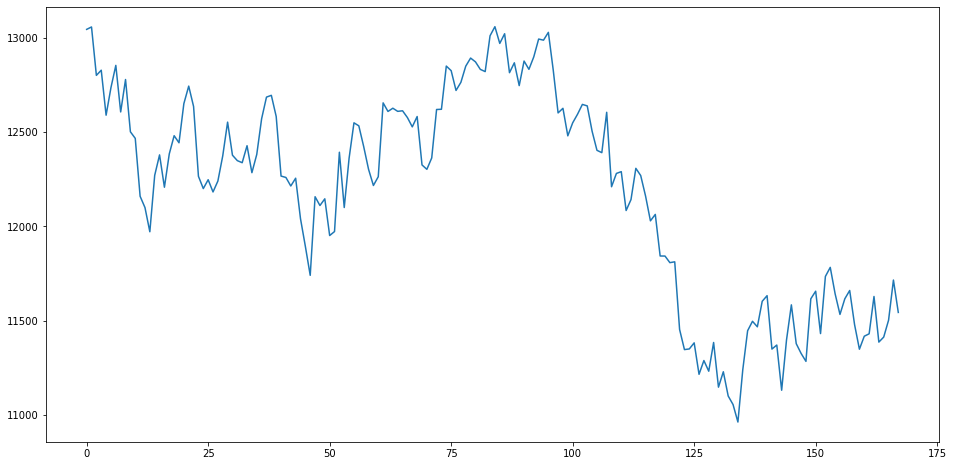

In [142]:
plt.figure(figsize = (16, 8))
plt.plot(dow[:,5])

#### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

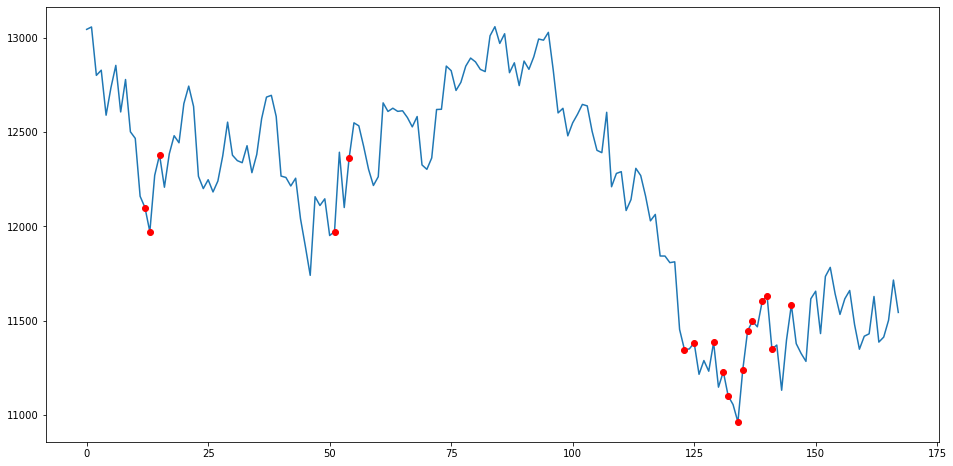

In [144]:
plt.figure(figsize = (16, 8))
plt.plot(dow[:,5])
plt.plot(where(VOLUME_MASK)[0],
               dow[where(VOLUME_MASK)[0], 5],
               "ro")

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>